#**DATA ANALYTICS: Analisando os dados da CEAP**

---

*Projeto Módulo 5 | [Gabriela Antunes](https://www.linkedin.com/in/gabriela-lantunes/), [Juliano da Mata](https://www.linkedin.com/search/results/all/?keywords=juliano%20fran%C3%A7a%20da%20mata&origin=RICH_QUERY_SUGGESTION&position=0&searchId=d114c873-3e54-4417-82fd-aa914bdff5dc&sid=.-~), [Rhayza Pinto](https://www.linkedin.com/in/rhayza-pinto/) e [Raian Porto](https://www.linkedin.com/in/raianporto/)*

---


<img alt="Colaboratory logo" width="100%" src="https://www.ambientelegal.com.br/wp-content/uploads/plenario-camara-deputados.jpg">

## 1.Entendimento do Desafio

O grupo foi escalado para investigar os gastos dos parlamentares brasileiros nos anos de 2019, 2020 e 2021 (até agosto). Para isso vamos utilizar o conjunto de dados
sobre a Cota para o Exercício da Atividade Parlamentar, a CEAP. 

**O que é a CEAP?**

A CEAP pode ser definida como: "cota única mensal destinada a
custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar". Essa ajuda de custo cobre despesas como:

* Passagens aéreas; 
* Telefonia; 
* Serviços postais; 
* Manutenção de escritórios de apoio à atividade parlamentar; 
* Assinatura de publicações; 
* Fornecimento de alimentação ao parlamentar; 
* Hospedagem; 
* Outras despesas com locomoção, contemplando locação ou fretamento de aeronaves, veículos automotores e embarcações, serviços de táxi, pedágio e estacionamento e passagens terrestres, marítimas ou fluviais;
* Combustíveis e lubrificantes; 
* Serviços de segurança; 
* Contratação de consultorias e trabalhos técnicos;
* Divulgação da atividade parlamentar, exceto nos 120 dias anteriores às eleições; 
* Participação do parlamentar em cursos, palestras, seminários, simpósios, congressos ou eventos congêneres; 
* E a complementação do auxílio-moradia


A CEAP é regida por uma série de regras que podem ser consultadas [aqui](https://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-norma-cd-mesa.html). Seu valor mensal é definido de acordo com a unidade federativa pela qual o parlamentar foi eleito e é cumulativo dentro de um mesmo período financeiro, ou seja, dentro de um mesmo ano. 



### 1.1.Objetivo: Quais as perguntas a serem respondidas por esta análise?


Neste projeto vamos tentar responder as seguintes questões:

1. Como se comportam os gastos com cotas parlamentares ao longo
do tempo? Existe alguma tendência de aumento ou redução desse
custo?
2. Qual a média de gastos por parlamentar?
3. Quais foram os parlamentares que mais e que menos consumiram
recursos?
4. Quais são as categorias de despesas mais onerosas dentre os
recursos destinados às cotas parlamentares?
5. Quais são os trechos de viagem mais recorrentes entre as despesas
de viagem?
6. Qual a média de gastos por estado?
7. Qual é o valor total de gastos por estado?
8. Quais estados têm maior número de representantes?
9. Há alguma correlação entre a quantidade de parlamentares por
estado e o valor total dos gastos?
10. Qual a média de gastos por partido?
11. Quais são os partidos que mais e que menos consumiram a
cota parlamentar?
12. Há alguma correlação entre a quantidade de parlamentares
por partido e o valor total dos gastos?

Além delas, analisaremos questões extra que observamos ao longo da análise do cojunto de dados.

**Metodologia do Projeto**

O projeto foi desenvolvido em através de análise exploratória, estatísticas descritivas e contrução de visializações de dados, sendo dividido em quatro etapas: *entender o problema, preparar os dados, analisar os dados e apresentar os resultados.*

---

##2.Entendendo os Dados:


Nesta etapa coletaremos os dados iniciais, descrevendo os referidos dados, bem como explorando-os com as estatísticas descritivas.

###2.1.Coletando os dados iniciais

As fontes de dados que serão utilizadas no projeto estão disponíveis no portal da Câmara dos Deputados.

Serão utilizados os arquivos dos anos de 2019, 2020 e 2021 (até agosto) contendo o pedido de reembolso dos deputados por gastos comtemplados pela CEAP.

In [1]:
#Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
from datetime import datetime

In [2]:
#código para aumentar o número de linhas e colunas exibidos pelo colab
pd.set_option("display.max_rows", 150, "display.max_columns", 35)

Preferimos carregar os datasets baixados no Google Divre para agilizar a leitura dos arquivos, que são grandes

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_2019 = pd.read_csv('/content/drive/MyDrive/Projeto_Mod05/Ano-2019.csv', sep=';')
df_2020 = pd.read_csv('/content/drive/MyDrive/Projeto_Mod05/Ano-2020.csv', sep=';')
df_2021 = pd.read_csv('/content/drive/MyDrive/Projeto_Mod05/Ano-2021.csv', sep=';')

###2.2. Descrevendo os dados


Por se tratarem de conjuntos de dados com as mesmas coluna e padrões, se diferenciado apenas em relação às datas, decidimos juntar os três arquivos em um único dataframe para realizar as análises:

In [7]:
#código que junta os três datasets em um único dataframe
df_unico = pd.concat([df_2019, df_2020, df_2021], ignore_index=True)
df_unico.head()

txNomeParlamentar  cpf  ideCadastro  nuCarteiraParlamentar  nuLegislatura  \
0        LID.GOV-CD  NaN          NaN                    NaN           2015   
1        LID.GOV-CD  NaN          NaN                    NaN           2019   
2        LID.GOV-CD  NaN          NaN                    NaN           2019   
3        LID.GOV-CD  NaN          NaN                    NaN           2019   
4        LID.GOV-CD  NaN          NaN                    NaN           2019   

  sgUF sgPartido  codLegislatura  numSubCota  \
0  NaN       NaN              55          13   
1  NaN       NaN              56          13   
2  NaN       NaN              56          13   
3  NaN       NaN              56          13   
4  NaN       NaN              56          13   

                                 txtDescricao  numEspecificacaoSubCota  \
0  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                        0   
1  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                        0   
2  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                        0   
3  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                        0   
4  FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR                        0   

  txtDescricaoEspecificacao                          txtFornecedor  \
0                       NaN                 CRISTIANE FERREIRA EPP   
1                       NaN                 CRISTIANE FERREIRA EPP   
2                       NaN                 CRISTIANE FERREIRA EPP   
3                       NaN                 CRISTIANE FERREIRA EPP   
4                       NaN  PANIFICADORA FERREIRA NETO LTDA - EPP   

           txtCNPJCPF txtNumero  indTipoDocumento           datEmissao  \
0  037.139.030/0010-8       693                 4  2019-01-16T00:00:00   
1  037.139.030/0010-8       716                 4  2019-02-04T00:00:00   
2  037.139.030/0010-8       723                 4  2019-02-25T00:00:00   
3  037.139.030/0010-8       753                 4  2019-03-28T00:00:00   
4  037.139.030/0010-8       791                 4  2019-05-07T00:00:00   

   vlrDocumento  vlrGlosa  vlrLiquido  numMes  numAno  numParcela  \
0        111.30       0.0      111.30       1    2019           0   
1        117.19       0.0      117.19       2    2019           0   
2        120.15       0.0      120.15       2    2019           0   
3        151.18       0.0      151.18       3    2019           0   
4        119.90       0.0      119.90       5    2019           0   

  txtPassageiro txtTrecho  numLote  numRessarcimento  vlrRestituicao  \
0           NaN       NaN  1554246               NaN             NaN   
1           NaN       NaN  1570078               NaN             NaN   
2           NaN       NaN  1570503               NaN             NaN   
3           NaN       NaN  1579375               NaN             NaN   
4           NaN       NaN  1590980               NaN             NaN   

   nuDeputadoId  ideDocumento  \
0          2812       6738121   
1          2812       6769606   
2          2812       6771099   
3          2812       6793690   
4          2812       6821674   

                                        urlDocumento  
0  http://camara.leg.br/cota-parlamentar/nota-fis...  
1  http://camara.leg.br/cota-parlamentar/nota-fis...  
2  http://camara.leg.br/cota-parlamentar/nota-fis...  
3  http://camara.leg.br/cota-parlamentar/nota-fis...  
4  http://camara.leg.br/cota-parlamentar/nota-fis...

Com isso, passamos a ter um conjuto de dados de 31 colunas e 555500 mil linhas:

In [ ]:
df_unico.shape

(555500, 31)

In [ ]:
# Conhecendo as varíaveis e seus tipos.

display(df_unico.dtypes)


txNomeParlamentar             object
cpf                           object
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

Numa primeira análise podemos identificar que a coluna data de emissão não está no tipo data. Essa é uma mudança de tipo que deverá ser feita no tratamento dos dados, outras poderão surgir de acordo com a necessidade.

**Dicionário de variáveis** 

* `txNomeParlamentar` - Nome adotado pelo Parlamentar ao tomar posse do seu mandato. Compõe-se de dois elementos: um prenome e o nome; dois nomes; ou dois prenomes, salvo, a juízo do Presidente da Casa legislativa, que poderá alterar essa regra para que não ocorram confusões.

* `ideCadastro` - Número que identifica unicamente um deputado federal na CD.

* `nuCarteiraParlamentar` - Documento usado para identificar um deputado federal na CD. Pode alterar a cada Legislatura nova.

* `nuLegislatura` - Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais. No contexto da cota CEAP, representa o ano base de início da legislatura e é utilizado para compor a Carteira Parlamentar, pois esta poderá ser alterada à medida que se muda de Legislatura.

* `sgUF` - No contexto da cota CEAP, representa a unidade da federação pela qual o deputado foi eleito e é utilizada para definir o valor da cota a que o deputado tem.

* `sgPartido` - O seu conteúdo representa a sigla de um partido.

* `codLegislatura` - No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura, que um número ordinal sequencial, alterado de um em um, a cada início de uma nova Legislatura (por exemplo, a Legislatura que iniciou em 2011 é a 54ª Legislatura).

* `numSubCota` - Representa o código do Tipo de Despesa referente à despesa realizada pelo deputado e comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado.

* `txtDescricao` - O seu conteúdo é a descrição do Tipo de Despesa relativo à despesa em questão.

* `numEspecificacaoSubCota` - Há despesas cujo Tipo de Despesa necessita ter uma especificação mais detalhada (por exemplo, “Combustível”). O conteúdo deste dado representa o código desta especificação mais detalhada.

* `txtDescricaoEspecificacao` - Representa a descrição  especificação mais detalhada de um referido Tipo de Despesa.

* `txtFornecedor` - O conteúdo deste dado representa o nome do fornecedor do produto ou serviço presente no documento fiscal.

* `txtCNPJCPF` - Representa o CNPJ ou o CPF do emitente do documento fiscal, quando se tratar do uso da cota em razão do reembolso despesas comprovadas pela emissão de documentos fiscais.

* `txtNumero` - Número de face do documento fiscal emitido ou o número do documento que deu causa à despesa debitada na cota do deputado.

* `indTipoDocumento` - Este dado representa o tipo de documento do fiscal – 0 (Zero), para Nota Fiscal; 1 (um), para Recibo; e 2, para Despesa no Exterior.

* `datEmissao` - Data de emissão do documento fiscal ou a data do documento que tenha dado causa à despesa.

* `vlrDocumento` - Valor de face do documento fiscal ou o valor do documento que deu causa à despesa. Quando se tratar de bilhete aéreo, esse valor poderá ser negativo, significando que o referido bilhete é um bilhete de compensação, pois compensa um outro bilhete emitido e não utilizado pelo deputado (idem para o dado vlrLiquido abaixo).

* `vlrGlosa` - Representa o valor da glosa do documento fiscal que incidirá sobre o Valor do Documento, ou o valor da glosa do documento que deu causa à despesa.

* `vlrLiquido` - Representa o valor líquido do documento fiscal ou do documento que deu causa à despesa e será calculado pela diferença entre o Valor do Documento e o Valor da Glosa. É este valor que será debitado da cota do deputado. Caso o débito seja do Tipo Telefonia e o valor seja igual a zero, significa que a despesa foi franqueada.

* `numMes` - Mês da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o ano, para determinar em que período o débito gerará efeito financeiro sobre a cota.

* `numAno` - Ano da competência financeira do documento fiscal ou do documento que deu causa à despesa. É utilizado, junto com o mês, para determinar em que período o débito gerará efeito financeiro sobre a cota.

* `numParcela` - Número da parcela do documento fiscal. Ocorre quando o documento tem de ser reembolsado de forma parcelada.

* `txtPassageiro` - Nome do passageiro, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.

* `txtTrecho` - Trecho da viagem, quando o documento que deu causa à despesa se tratar de emissão de bilhete aéreo.

* `numLote` - O Número do Lote representa uma capa de lote que agrupa os documentos que serão entregues à Câmara para serem ressarcidos. Este dado, juntamente com o Número do Ressarcimento, auxilia a localização do documento no Arquivo da Casa.

* `numRessarcimento` - Número do Ressarcimento indica o ressarcimento do qual o documento fez parte por ocasião do processamento do seu reembolso. Este dado, juntamente com o Número do Ressarcimento, auxilia a localização do documento no Arquivo da Casa.

* `vlrRestituicao` - Representa o valor restituído do documento fiscal que incidirá sobre o Valor do Documento.

* `nuDeputadoId` - Número que identifica um Parlamentar ou Liderança na Transparência da Cota para Exercício da Atividade Parlamentar.

* `urlDocumento` - endereço eletrônico em que os documentos fiscais podem ser consultados


###2.3.Estatísticas Descritivas


Agora que já conhecemos os nossos dados, passamos para a etapa de aplicação de estatística descritiva, com especial atenção para identificação de valores faltantes e presença de outliers. Primeiramente, vamos verfificar as estatísticas das colunas numéricas do dataframe: 

In [8]:
round(df_unico.describe().T, 2)

count          mean           std         min  \
cpf                      553661.0  3.208493e+10  2.921625e+10  1608657.00   
ideCadastro              553759.0  1.660153e+05  4.586451e+04     4930.00   
nuCarteiraParlamentar    553759.0  2.890100e+02  1.531300e+02        1.00   
nuLegislatura            555500.0  2.018890e+03  6.400000e-01     2015.00   
codLegislatura           555500.0  5.597000e+01  1.600000e-01       55.00   
numSubCota               555500.0  2.506600e+02  4.120700e+02        1.00   
numEspecificacaoSubCota  555500.0  2.500000e-01  4.600000e-01        0.00   
indTipoDocumento         555500.0  1.030000e+00  1.570000e+00        0.00   
vlrDocumento             555500.0  8.844100e+02  2.464530e+03    -6605.57   
vlrGlosa                 555500.0  3.900000e+00  1.394500e+02        0.00   
vlrLiquido               555500.0  8.087400e+02  2.464250e+03    -7821.20   
numMes                   555500.0  6.080000e+00  3.340000e+00        1.00   
numAno                   555500.0  2.019670e+03  7.800000e-01     2019.00   
numParcela               555500.0  0.000000e+00  2.000000e-02        0.00   
numLote                  555500.0  1.130421e+06  7.872364e+05        0.00   
numRessarcimento         180842.0  0.000000e+00  0.000000e+00        0.00   
vlrRestituicao              364.0  8.736300e+02  2.367570e+03        1.00   
nuDeputadoId             555500.0  2.734360e+03  7.733400e+02       19.00   
ideDocumento             555500.0  5.045073e+06  2.865350e+06        0.00   

                                  25%           50%           75%  \
cpf                      6.197278e+09  2.227515e+10  5.098035e+10   
ideCadastro              1.415310e+05  1.789380e+05  2.044490e+05   
nuCarteiraParlamentar    1.600000e+02  2.920000e+02  4.240000e+02   
nuLegislatura            2.019000e+03  2.019000e+03  2.019000e+03   
codLegislatura           5.600000e+01  5.600000e+01  5.600000e+01   
numSubCota               3.000000e+00  1.000000e+01  1.220000e+02   
numEspecificacaoSubCota  0.000000e+00  0.000000e+00  0.000000e+00   
indTipoDocumento         0.000000e+00  0.000000e+00  1.000000e+00   
vlrDocumento             6.300000e+01  2.013800e+02  7.476000e+02   
vlrGlosa                 0.000000e+00  0.000000e+00  0.000000e+00   
vlrLiquido               4.951000e+01  1.845000e+02  6.420000e+02   
numMes                   3.000000e+00  6.000000e+00  9.000000e+00   
numAno                   2.019000e+03  2.019000e+03  2.020000e+03   
numParcela               0.000000e+00  0.000000e+00  0.000000e+00   
numLote                  0.000000e+00  1.620008e+06  1.707915e+06   
numRessarcimento         0.000000e+00  0.000000e+00  0.000000e+00   
vlrRestituicao           6.980000e+00  2.610000e+01  2.774000e+02   
nuDeputadoId             2.265000e+03  3.062000e+03  3.312000e+03   
ideDocumento             1.705442e+06  6.888214e+06  7.075930e+06   

                                  max  
cpf                      9.989866e+10  
ideCadastro              2.173300e+05  
nuCarteiraParlamentar    6.270000e+02  
nuLegislatura            2.019000e+03  
codLegislatura           5.600000e+01  
numSubCota               9.990000e+02  
numEspecificacaoSubCota  4.000000e+00  
indTipoDocumento         4.000000e+00  
vlrDocumento             1.720000e+05  
vlrGlosa                 8.600000e+04  
vlrLiquido               1.512600e+05  
numMes                   1.200000e+01  
numAno                   2.021000e+03  
numParcela               1.000000e+00  
numLote                  1.789366e+06  
numRessarcimento         0.000000e+00  
vlrRestituicao           2.000000e+04  
nuDeputadoId             3.487000e+03  
ideDocumento             7.245337e+06

**Quanto ao resumo das estatísticas, das variáveis numéricas do dataset, podemos verificar que:**

* Existem **valores negativos** nas colunas vlrDocumento e vlrLiquido, como já havia sido indicado no dicionário de variáveis.
* **A média da coluna vlrLiquido, a que será mais utilizada na análise, não é compatível com sua mediana**. O que indica forte presença de outliers, confirmada pela diferença de distribuição dos valores de cada quartil da variável.
* A maioria dos valores de glosa é 0.

Para entendermos melhor a distribuição dos valores de líquidos do dataframe vamos fazer boxplots para essa coluna. 

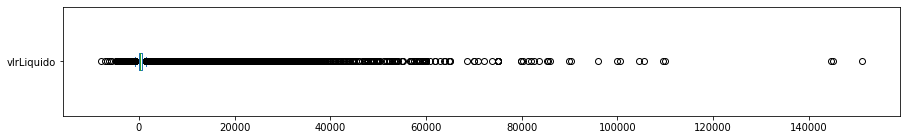

In [ ]:
#boxplot dos valores líquidos gastos pelos parlamentares
df_unico['vlrLiquido'].plot.box(vert=False, figsize=(15,2))

No gráfico com todos os dados, podemos perceber que a presença de outliers é tanta que mal conseguimos visualizar a caixa de distribuição doa dados. Por isso, faremos um outro gráfico delimitando valores entre 0 e 1500 reais:

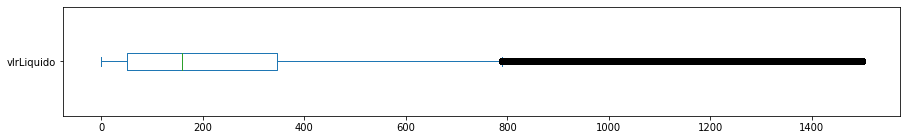

In [ ]:
#boxplot dos valores líquidos gastos pelos parlamentares desconsiderando negativos e alguns ouliers
df_unico['vlrLiquido'].loc[(df_unico['vlrLiquido'] < 1500) & (df_unico['vlrLiquido'] > 0)].plot.box(vert=False, figsize=(15,2))

Agora, é possível ver que a distribução dos valores não é simétrica. No terceiro quartil, a irregularidade fica bem visível. 

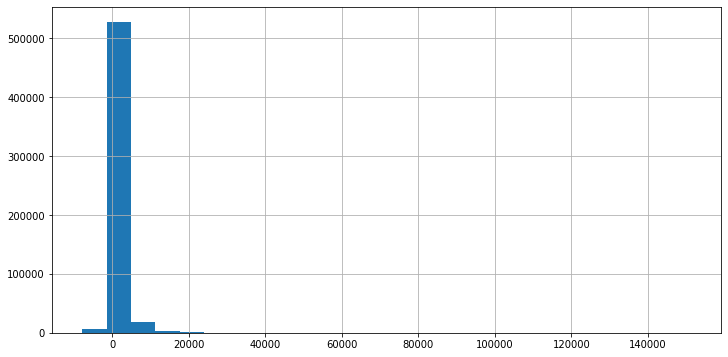

In [ ]:
df_unico.vlrLiquido.hist(bins = 25, figsize=(12,6))

Com o histograma, confirmamos a irregularidade da frequência dos valores líquidos.

A presença de tantos outliers pode influenciar em estatísticas como média, tornando-as menos precisa. No entanto, por se tratarem de informações de gastos dos parlamentares, dinheiro que foi efetivamente usado e sairá dos cofres públicos, não é razoável exluírmos esses valores da nossa análise.

Agora, vamos verificar a porcentagem de dados nulos em cada coluna:

In [ ]:
round(df_unico.isnull().mean()*100, 2)

txNomeParlamentar             0.00
cpf                           0.33
ideCadastro                   0.31
nuCarteiraParlamentar         0.31
nuLegislatura                 0.00
sgUF                          0.31
sgPartido                     0.31
codLegislatura                0.00
numSubCota                    0.00
txtDescricao                  0.00
numEspecificacaoSubCota       0.00
txtDescricaoEspecificacao    75.49
txtFornecedor                 0.01
txtCNPJCPF                    4.28
txtNumero                     0.00
indTipoDocumento              0.00
datEmissao                    2.82
vlrDocumento                  0.00
vlrGlosa                      0.00
vlrLiquido                    0.00
numMes                        0.00
numAno                        0.00
numParcela                    0.00
txtPassageiro                76.69
txtTrecho                    76.88
numLote                       0.00
numRessarcimento             67.45
vlrRestituicao               99.93
nuDeputadoId        

**Quanto à questão de dados faltantes, podemos identificar que:**

Muitas colunas do dataframe possuem valores faltantes. Porém, com base nas informações do dicionário de variáveis, sabemos que algumas colunas são de preenchimento facultativo. É o caso de txtDescricaoEspecificacao, txtPassageiro, txtTrecho, entre outras. Algumas colunas, no entanto, podem prejudicar a análise por estarem como menos dados. São elas:

* **`sgPartido`** 
* **`sgUF`**
* **`dataEmissao`**

Abordaremos mais a fundo essa questão na etapa seguinte, a de tratamento dos dados.

### 2.4.Tratamento


Antes de partirmos para a análise em si, iremos ajustar o nosso dataset, tirando algumas colunas que não iremos usar, criando colunas que facilitaram nossa análise e preenchendo dados faltantes que julgarmos necessaários. Para começar, vamos renomear as colunas do dataset:

In [9]:
#código que renomeia as colunas
df_unico.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

Depois, vamos remover coluna que não serão usadas para responder as questões propostas por essa análise pois possuem apenas informações secundárias sobre os parlamentares e sobre a legislatura:

In [10]:
#código para remover as colunas desnecessárias:
for column in ['cpf','id_cadastro', 'carteira_parlamentar', 'cod_legislatura','id_deputado']:
  df_unico.drop(columns=column, inplace=True)

Verificamos a presença de linhas duplicadas:

In [11]:
df_unico.duplicated().values.sum()

0

Depois, iremos alterar o tipo da coluna data de emissão para datetime:

In [12]:
df_unico['data_emissao'] = pd.to_datetime(df_unico['data_emissao'], format='%Y-%m-%d')

Mas isso não será suficiente para podermos utilizar a coluna para análises temporais, uma vez que existem dados faltantes nesta coluna. Esses dados são referentes às datas de emissão dos comprovantes fiscais, o que dificulta seu preenchimento na ausência dessa informação. Existe no dataset, no entanto, outras colunas referentes à data em que o valor foi gasto e que estão 100% preenchidas, são as colunas 'mês' e 'ano'. Dessa maneira, iremos tratá-las para serem utilizadas nas análises temporais.

In [13]:
#criação da coluna que une o ano e o mês para facilitar as análises temporais

#código que muda o tipo das colunas para permitir a concatenação
for column in ['mes', 'ano']:
  df_unico[column] = df_unico[column].astype('str')

#código que coloca o dígito 0 nos meses que tem só um dígito
df_unico['mes'] = df_unico['mes'].apply(lambda x: '0' + x if (len(x) == 1) else x)

#concatenação das colunas
df_unico["ano_mes"] = df_unico["ano"] + "-" + df_unico["mes"]

A nova coluna se chmara 'ano_mes' e é do tipo objeto porque não existe uma valor do tipo data sem a informação do dia.

Passamos para o tratamento dos dados faltantes da coluna 'partido'. Ao verificarmos essas linhas, percebemos que se tratam do lançamento de gastos das lideranças legislativas, de cada partido, do governo na câmara, da minoria, etc. Julgamos ser importante preencher a informação partidária pelo menos nas entradas de gastos referentes às lideranças de cada partido, uma vez que analisaremos os gastos de cada legenda. Já as lideranças que não são partidárias, deixaremos como estão, uma vez que o dinheiro que recebem a mais em nada tem a ver com os seus respectivos partidos.

In [14]:
#código que cria um df auxiliar só com as lideranças partidárias
df_liderancas = df_unico[df_unico['nome_parlamentar'].str.contains('liderança', case=False)]

In [15]:
#código que preenche a coluna partido com as informações partidárias contidas na coluna nome_parlamentar
df_liderancas['partido'] = df_liderancas['nome_parlamentar'].apply(lambda x: (' ').join(x.split(' ')[2:]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
#código que coloca as informações preenchidas no nosso df principal
df_unico = df_unico.combine_first(df_liderancas)

In [17]:
#código que verifica a quantidade de nulos da coluna
round(df_unico['partido'].isnull().mean()*100, 2)

0.01

Podemos perceber que a porcentagem de nulos caiu para 0,01%, se resumindo às lideranças citadas acima.

Agora vamos padronizar a coluna partido, colocando os nomes no mesmo padrão, uma vez que temos nomes completos e abreviaturas:

In [18]:
#código que cria um dicionário com os nomes e abreviações dos partidos
dic_partidos = {'DEM':'DEMOCRATAS', 'PODE':'PODEMOS', 'PATRI':'PATRIOTA','PROS':'PARTIDO REPUBLICANO DA ORDEM SOCIAL','PP':'PROGRESSISTAS'}

#código que padroniza o nome dos partidos
for chave, valor in dic_partidos.items():
  df_unico['partido'] = df_unico['partido'].apply(lambda x: chave if x == valor else x)

Os dados faltantes da coluna UF também se referem aos lançamentos de gastos das lideranças. Ao avaliar o preenchimento desses dados, decidimos que não seria necessário, uma vez que a cota extra oferecida às lideranças não tem nada a ver com o estado pelo qual elas foram eleitas e, portanto, não devem influenciar as análises dos gastos relacionados às unidades federativas. Por isso, deixaremos essa coluna como está:

Por fim, sobre os `valores negativos` presentes nas colunas 'vlr_documento' e 'vlr_líquido' , *decidimos considerá-los* para as análises nos baseando na informação fornecida pela câmara de que esses valores são **compensatórios**, ou seja, já foram debitados da cota do parlamentar em outro momento e por isso não podem ser pagos para eles novamente.

Segundo a explicação dos dados disponível no site da câmara:

"(...)Quando se `tratar de bilhete aéreo, esse valor poderá ser negativo`, significando que o referido bilhete é um bilhete de `compensação`, pois compensa um outro bilhete emitido e `não utilizado pelo deputado`."

Apenas dois valores negativos do dataframe não se enquadram nessa categoria, são eles:

In [19]:
df_unico.query('vlr_liquido < 0 & subcota != 998 & descricao != "PASSAGEM AÉREA - RPA"')

nome_parlamentar  ano_legislatura  UF partido  subcota  \
312202  Eduardo Bolsonaro             2019  SP     PSL      120   
317203         Enio Verri             2019  PR      PT        3   

                                            descricao  especificacao_subcota  \
312202  LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES                      0   
317203                  COMBUSTÍVEIS E LUBRIFICANTES.                      1   

       descricao_especificacao                          fornecedor  \
312202                     NaN  QUASAR LOCADORA DE VEICULOS EIRELI   
317203    Veículos Automotores              Siao Auto Posto Eireli   

        CNPJCPF_fornecedor numero_documento  tipo_documento  \
312202  380.246.750/0014-3             2982               4   
317203  243.507.710/0017-7             1222               0   

              data_emissao  vlr_documento  vlr_glosa  vlr_liquido mes   ano  \
312202 2020-03-13 00:00:00         6800.0    3834.00      -868.00  02  2020   
317203 2020-11-03 01:00:00         6550.0    4431.33     -1762.66  10  2020   

        num_parcela passageiro trecho  lote_documento  num_ressarcimento  \
312202            0        NaN    NaN         1688002                NaN   
317203            0        NaN    NaN         1727832                NaN   

        vlr_restituicao  id_documento  \
312202              NaN       7040119   
317203              NaN       7117797   

                                            url_documento  ano_mes  
312202  http://camara.leg.br/cota-parlamentar/nota-fis...  2020-02  
317203  https://www.camara.leg.br/cota-parlamentar/doc...  2020-10

Os dois gastos acima não são de passagens áereas e não tem o valor de glosa maior que o valor do documento para justificar serem nagativos. Por falta de informações, não conseguimos explicá-los, mas também não sentimos confiança de deletá-los. Portanto, continuarão no conjunto de dados.

De todas as formas, criaremos também um dataframe sem valores negativos para uso em questões específicas.

In [20]:
#código que cria um df apenas com valores positivos
df_valores_positivos = df_unico.query('vlr_liquido >= 0')

##3.Análise dos Dados:


#### **3.1.Respondendo as perguntas propostas**

Agora, finalmente, o nosso dataset está do jeito que julgamos ideal para tentarmos responder os questionamentos propostos nesse projeto. 

#####**Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?**

Para visualizarmos melhor os gastos através do período analisado, fizemos um gráfico interativo. Ao colocar o mouse em cima do ponto, é possível ver a soma dos gastos em cada mês:

In [ ]:
# Agrupando a soma dos gastos por data
df_gastos_data = df_unico.groupby(["ano_mes"], as_index=False)["vlr_liquido"].sum()

import warnings
warnings.filterwarnings("ignore")

#plotando o gráfico
px.line(df_gastos_data, 
        x='ano_mes', 
        y='vlr_liquido', 
        title="Comportamento dos Gastos 2019 - 2021",
        labels={'ano_mes': 'Mês/Ano',
                'vlr_liquido': 'Gastos em Milhões (R$)'},
        markers=True)

In [28]:
round(df_unico.groupby(['ano'])[['vlr_liquido']].sum() ,1)

vlr_liquido
ano              
2019  205862505.2
2020  152617344.0
2021   90777827.8

* Março 2020 - Início pandemia;

* Novembro/Dezembro 2020 - Ano eleitoral(Prefeitos/Vereadores);

* Atenção a essas datas:  
   * `01/12/2020 → R$ 22.038.642,85`
   Um aumento significativo de `59,44 %` em relação ao mês anterior 
  `R$ 13.100.833,38`.

   * `01/01/2021 → R$ 11.316.883,54`. 
   Seguido de uma queda expressiva no mês seguinte de `51,35 %`.

   * `01/08/2021 → R$ 3.474.483.24` Houve alta mensal nos gastos de Janeiro a Maio seguido de queda em Agosto.

   * 2019 → `R$ 205.862.505,2`  
   
   * 2020 → `R$ 152.617.344,01`

   * 2021(até Agosto) → `R$ 90.777.827.85`


   *  Acrescentando  setembro e outubro de 2021, à 56ª legislatura , gasto de `R$ 166.436.241,09` que ainda pode aumentar pois tem até `90 dias` para declarar os meses faltantes. Não é correto afirmar o total gasto por um parlamentar, uma vez que ele ainda pode apresentar documentos referentes a despesas de meses anteriores. O valor do reembolso referente ao uso da Cota é depositado na conta do deputado, em média, até três dias úteis depois da solicitação.

   *  Houve queda de gastos de 2019 para 2020. Porém, como não temos os dados completos de 2021, não dá para afirmar que essa tendência se manterá.
   
   [TODOS OS DEPUTADOS](https://www.camara.leg.br/transparencia/gastos-parlamentares?legislatura=56&ano=2021&mes=&por=deputado&deputado=&uf=&partido=) 


#####**Qual a média de gastos por parlamentar?**

Nosso conjunto de dados possui entradas de mais de 800 parlamentares. Por esse motivo, mostraremos as 20 maiores médias de gasto, para facilitar a visualização:

In [ ]:
# Média de valores gastos por parlamentar
df_media_parlamentar = df_unico.groupby(["nome_parlamentar"], as_index=False)[["vlr_liquido"]].mean().round(2).sort_values(by="vlr_liquido", 
                                                                                                                                       ascending=False).head(20)
df_media_parlamentar

nome_parlamentar  vlr_liquido
373               JOSÉ REINALDO     13452.61
8                 ALBERTO FRAGA     10214.52
170       DELEGADO FRANCISCHINI      8975.94
331             HEULER CRUVINEL      8881.52
161                 CÉSAR HALUM      8865.13
735               SANDES JÚNIOR      8755.06
526                MARCOS ABRÃO      8641.78
225           EZEQUIEL TEIXEIRA      8432.23
450            LIDERANÇA DO PDT      7532.83
348              INDIO DA COSTA      7138.87
110                CAJAR NARDES      7075.82
452  LIDERANÇA DO PROGRESSISTAS      6487.50
349                IRMÃO LAZARO      6348.25
628         PROF. GEDEÃO AMORIM      5938.51
257             FERNANDO TORRES      5402.69
833             ZECA CAVALCANTI      5383.24
601               Ney Leprevost      5369.20
686             RODRIGO MARTINS      5281.35
107               CABUÇU BORGES      4994.48
219             ELIZEU DIONIZIO      4825.66

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

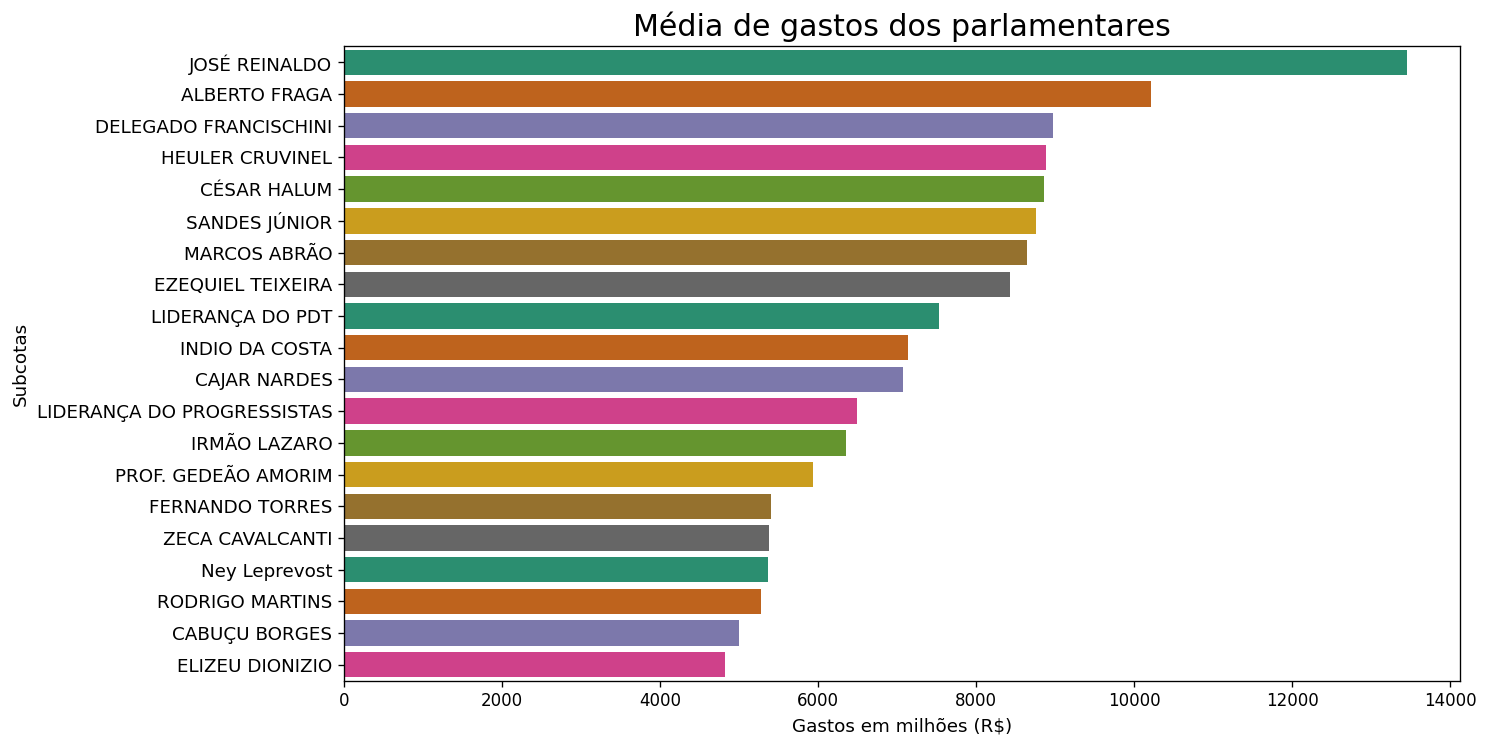

In [ ]:
plt.figure(figsize=(12,7), dpi=120)
plt.title('Média de gastos dos parlamentares', fontsize=18)
sns.barplot(y="nome_parlamentar", x="vlr_liquido", data=df_media_parlamentar, palette='Dark2')
plt.xlabel('Gastos em milhões (R$)', fontsize=11)
plt.ylabel('Subcotas', fontsize=11)
plt.yticks(fontsize=11)

Os cinco parlamentares que tiveram o maior gasto médio no período são **José Reinaldo, Alberto Fraga, Delegado Francischini, Heuler Cruvinel e César Halum**. Os parlamentares que mais gastam `não` são necessariamente os que tem maior média de gastos, como veremos a seguir:

#####**Quais foram os parlamentares que gastaram mais e que menos consumiram recursos?**

In [ ]:
# Agrupando soma dos valores de gastos dos Deputados
df__gastos = df_unico.groupby(["nome_parlamentar"]
                                                    )["vlr_liquido"].sum().sort_values(axis=0, 
                                                                                       ascending=False)
pd.DataFrame(df__gastos).head(10)

vlr_liquido
nome_parlamentar               
Jéssica Sales        1415460.06
Wellington Roberto   1366059.77
Silas Câmara         1359411.33
Flaviano Melo        1331748.68
João Maia            1331131.21
Juscelino Filho      1297830.95
Sebastião Oliveira   1295854.50
Beto Faro            1289449.37
Jesus Sérgio         1287145.48
Sidney Leite         1282268.51

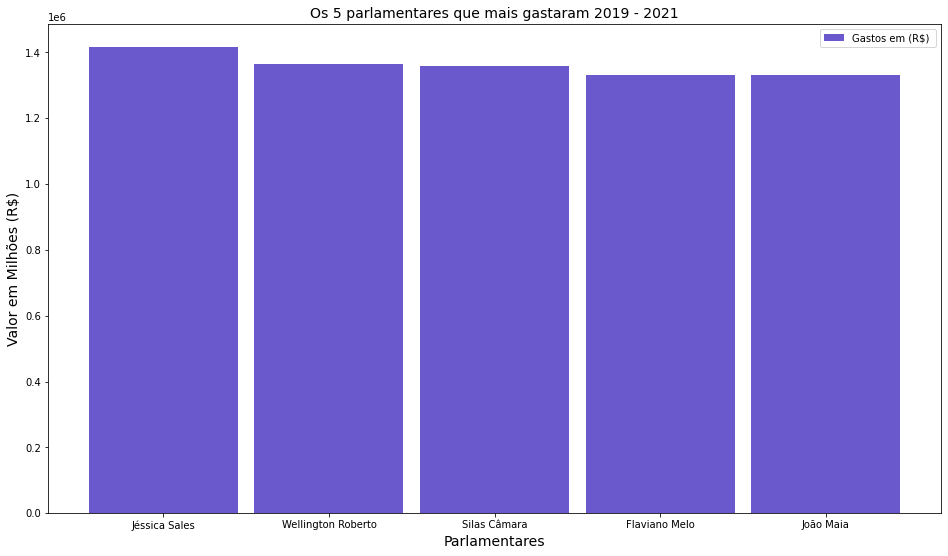

In [ ]:
# Agrupando soma dos valores dos Deputados que mais consumiram
df_deputados_mais_consumiram = df_unico.groupby(["nome_parlamentar"], as_index=False)[["vlr_liquido"]].sum().sort_values(by='vlr_liquido', 
                                                                                                                         ascending=False).round(2).head()
# Declarando a figura ou o gráfico (x, y) ou (largura, altura)
plt.figure(figsize = (16,9))

x = df_deputados_mais_consumiram['nome_parlamentar'] 
y = df_deputados_mais_consumiram['vlr_liquido']

# Passando os parâmetros para a função bar, esta é a função principal que cria o gráfico de barras
plt.bar(x, y, width= 0.9, align="center",color="#6959CD")

# Criando a legenda das barras no gráfico
plt.legend(labels = ["Gastos em (R$) "])

# Dando o título para o "plot"
plt.title("Os 5 parlamentares que mais gastaram 2019 - 2021", fontsize=14)

# Nomeando o eixo "x" e "y"
plt.xlabel("Parlamentares", fontsize=14)
plt.ylabel("Valor em Milhões (R$)", fontsize=14)

# Exibindo o gráfico de barras
plt.show()

Top 5 parlamentares que mais gastaram neste periodo:

* [Jéssica Sales (MDB-AC)](https://www.camara.leg.br/deputados/178839/biografia) → `R$ 1.415.460,06`;

  * Líder desse ranking, gastou mais de `1.4Mi` ao longo desse período. Com este dinheiro seria possível pagar `1.167 salários mínimos`, que atualmente é de `R$ 1.212,00`. A parlamentar gastou cerca de `R$44.233,12`  por mês. De acordo com a lei da CEAP, por representar o estado do Acre a deputada teria um limite mensal de gastos de `R$44.632,46`, na média, a parlamentar ainda pode apresentar recibos para justificar valores.

  * A parlamentar está desde 2019 no congresso e apenas nos meses de Janeiro e Fevereiro de 2022 já gastou `R$ 78.433,55` da cota parlamentar. Salário atual `R$ 33.763,00` mais diversos benefícios como Auxílio-moradia em 2022(Recebeu `R$ 4.889,00`)

* [Wellington Roberto (PL-PB)](https://www.camara.leg.br/deputados/74043/biografia) → `R$ 1.366.059,77`;

* [Silas Câmara (REPUBLICANOS-AM)](https://www.camara.leg.br/deputados/74356/biografia) → `R$ 1.359.411,33`;


* [Flaviano Flávio Baptista de Melo (MDB-AC)](https://www.camara.leg.br/deputados/141434/biografia) → `R$ 1.331.748,68`;

* [João da Silva Maia(PL-RN)](https://www.camara.leg.br/deputados/141459/biografia) → `R$ 1.331.131,21`.



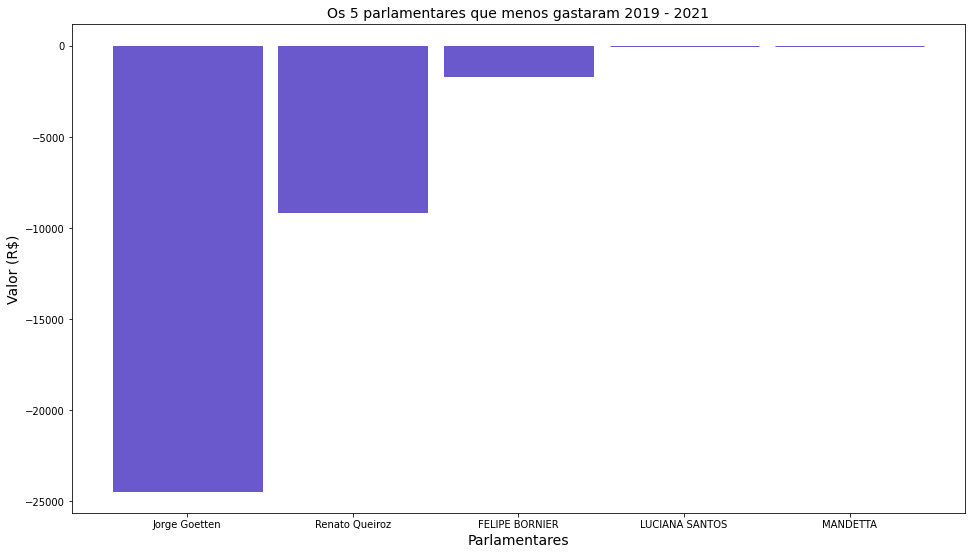

In [ ]:
# Agrupando soma dos valores dos Deputados que mais consumiram
df_deputados_menos_consumiram = df_unico.groupby(["nome_parlamentar"], as_index=False)[["vlr_liquido"]].sum().sort_values(by='vlr_liquido', 
                                                                                                                          ascending=True).round(2).head()
# Declarando a figura ou o gráfico (x, y) ou (largura, altura)
plt.figure(figsize = (16,9))

x = df_deputados_menos_consumiram['nome_parlamentar'] 
y = df_deputados_menos_consumiram['vlr_liquido']

# Passando os parâmetros para a função bar, esta é a função principal que cria o gráfico de barras
plt.bar(x, y, width= 0.9, align="center",color="#6959CD", edgecolor = "#6959CD")

# Dando o título para o "plot"
plt.title("Os 5 parlamentares que menos gastaram 2019 - 2021", fontsize=14)

# Nomeando o eixo "x" e "y"
plt.xlabel("Parlamentares", fontsize=14)
plt.ylabel("Valor (R$)", fontsize=14)

# Exibindo o gráfico de barras
plt.show()

Os 5 parlamentares que menos gastaram neste período:

* [Jorge Goetten de Lima(PL-SC)](https://www.camara.leg.br/deputados/214694/biografia) → `R$ -24.402,70`

  * Assumiu, como Suplente, o mandato de Deputado Federal, na Legislatura 2019-2023, a partir de 6 de Outubro de 2020. Afastou-se, em 30 de Janeiro de 2021.

* [Renato Andrade Queiroz(MDB-RR)](https://www.camara.leg.br/deputados/214477/biografia) → `- R$ -9107,21`

  *  Assumiu, como Suplente, o mandato de Deputado(a) Federal, na Legislatura 2019-2023, a partir de 10 de Setembro de 2020. Afastou-se, em 9 de Janeiro de 2021.

* [Felipe Leone Bornier de Oliveira (PROS-RJ)](https://www.camara.leg.br/deputados/141430/biografia)	 → `R$ -1675,06`

  * Licenciou-se do mandato de Deputado(a) Federal, na Legislatura 2015-2019, para assumir o cargo de Secretário de Estado de Esporte, Lazer e Juventude, no Estado do Rio de Janeiro, a partir de 2 de Janeiro de 2019.

* [Luciana Santos(PCdoB-PE)](https://www.camara.leg.br/deputados/160628/biografia) → `R$ 0.49`

  * Renunciou ao mandato de Deputada Federal, na Legislatura 2015-2019, em 1 de Janeiro de 2019.

* [Luiz Henrique Mandetta(DEM-MS)](https://www.camara.leg.br/deputados/160633/biografia) → `R$ 0.60`

  * Licenciou-se do mandato de Deputado Federal, na Legislatura 2015-2019, para assumir o cargo de Ministro de Estado da Saúde, a partir de 1 de Janeiro de 2019.


---

Podemos considerar que estes parlamentares são os que menos gastaram mas, `há deputados que abriram mão da cota parlamentar`.

* [Paula Moreno Paro Belmonte(CIDADANIA-DF)](https://www.camara.leg.br/deputados/204377/biografia)

* [Hercílio Araújo Diniz Filho(MDB - MG)](https://www.camara.leg.br/deputados/204539/biografia)


Se considerarmos só os deputados com somas positivas de valores líquidos, os 5 que menos consumiram a cota estão no gráfico abaixo:

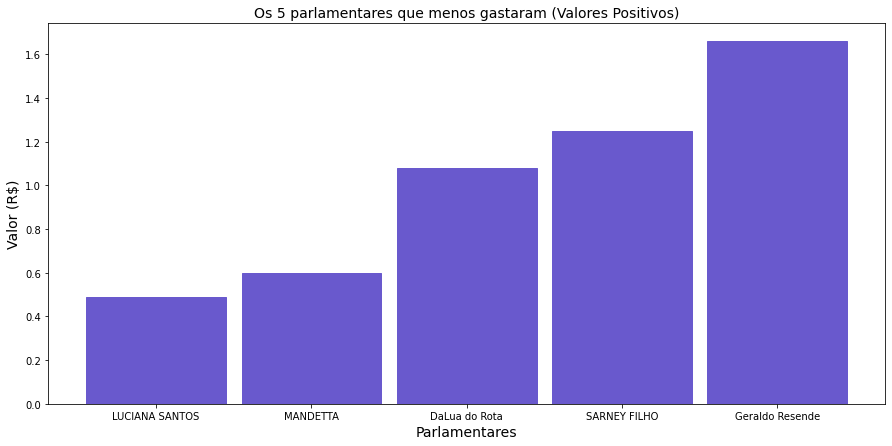

In [ ]:
df_deputados_positovos = df_unico.groupby(["nome_parlamentar"], as_index=False)[["vlr_liquido"]].sum().sort_values(by='vlr_liquido', ascending=True).round(2).head(8)
df_deputados_positovos = df_deputados_positovos.query('vlr_liquido > 0')

plt.figure(figsize = (15,7))

x = df_deputados_positovos['nome_parlamentar'] 
y = df_deputados_positovos['vlr_liquido']

plt.bar(x, y, width= 0.9, align="center",color="#6959CD", edgecolor = "#6959CD")

# Dando o título para o "plot"
plt.title("Os 5 parlamentares que menos gastaram (Valores Positivos)", fontsize=14)

# Nomeando o eixo "x" e "y"
plt.xlabel("Parlamentares", fontsize=14)
plt.ylabel("Valor (R$)", fontsize=14)

# Exibindo o gráfico de barras
plt.show()

#####**Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?**

Para responder essa pergunta vamos agrupar a soma dos valoresdo dataset com as categoria de gastos. Nesse caso esécífico, usaremos apenas os valores positivos. Vemos, então, que a 'Divulgação da atividade parmalentar' ocupa o topo da lista, com mais de 130 milhões gastos. 

In [ ]:
df_gastos_subcota = round(df_valores_positivos.groupby(['descricao'], as_index=False)[['vlr_liquido']].sum().sort_values(by='vlr_liquido', 
                                                                                                                         ascending=False), 1)
df_gastos_subcota

descricao  vlr_liquido
3                DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  137173739.9
12                               PASSAGEM AÉREA - RPA   81145805.2
8       LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES   67402446.9
9   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   61922509.0
2       CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.   56114008.4
1                       COMBUSTÍVEIS E LUBRIFICANTES.   35879625.5
18                                          TELEFONIA   11661624.8
11                         PASSAGEM AÉREA - REEMBOLSO    5904598.6
17                                   SERVIÇOS POSTAIS    3996960.5
5   HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...    3554820.6
6                  LOCAÇÃO OU FRETAMENTO DE AERONAVES    3534367.0
15  SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...    2603106.8
4          FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR    1975928.5
16          SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO    1796203.7
13                            PASSAGEM AÉREA - SIGEPA    1391787.5
0                           ASSINATURA DE PUBLICAÇÕES     573769.0
7                LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES     444900.0
14        PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS     193135.5
10  PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR     144209.2

Para deixar a informação ainda mais clara, montamos um gráfico que mostra o total de gastos de cada categoria. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

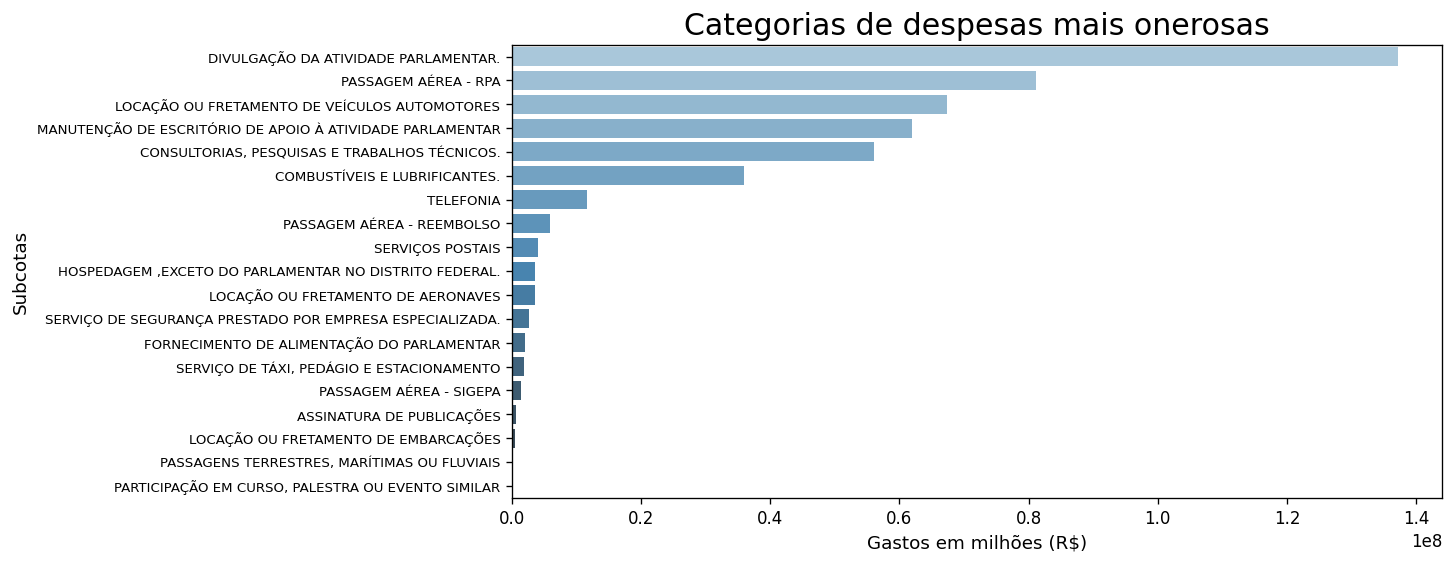

In [ ]:
plt.figure(figsize=(10,5), dpi=120)
plt.title('Categorias de despesas mais onerosas', fontsize=18)
sns.barplot(x="vlr_liquido", y="descricao", data=df_gastos_subcota, palette="Blues_d")
plt.xlabel('Gastos em milhões (R$)', fontsize=11)
plt.ylabel('Subcotas', fontsize=11)
plt.yticks(fontsize=8)

Com o gráfico, conseguimos ver que os valores gastos com a **divulgação da atividade parlamentar** são muito mais alto do que o com as demais catgorias. O Top 5 é composto ainda por Passagem aérea - RPA, Locação e Loteamento de veículos automotores, Manutenção de Escritório de Apoio à Atividade Parmalemtar e Consultorias, Pesquisas e Trabalhos Técnicos. Enquanto o gasto com participação de cursos e eventos é o menor de todos. Vale lembrar que algumas categorias tem um teto de gastos resulado pela lei, o que limita o seu total. 

#####**Quais são os trechos de viagem mais recorrentes entre as despesasde viagem?**

Ao longo do período analisado, os parlamentares viajaram por muitos trechos diferentes. Alguns, aparecem apenas uma vez no dataset. Listar todos eles prejudicaria a análise tornando a informação confusa. Dessa forma, usaremos um recorte dos 20 trechos mais percorridos pelos deputados. São eles:

In [ ]:
df_trechos = df_unico.groupby(['trecho'], as_index=False)[['nome_parlamentar']].count().sort_values(by='nome_parlamentar', ascending=False).head(20)
df_trechos

trecho  nome_parlamentar
243   BSB/BSB              9890
257   BSB/CGH              5083
777   CGH/BSB              4912
598   BSB/SDU              4134
2066  SDU/BSB              3987
326   BSB/CNF              3929
628   BSB/SSA              3737
896   CNF/BSB              3674
2222  SSA/BSB              3415
587   BSB/REC              2894
565   BSB/POA              2825
370   BSB/FOR              2699
1853  POA/BSB              2657
2000  REC/BSB              2638
1121  FOR/BSB              2402
349   BSB/CWB              2109
975   CWB/BSB              1974
402   BSB/GRU              1857
232   BSB/BEL              1792
61    BEL/BSB              1764

Vejamos a lista em um gráfico:

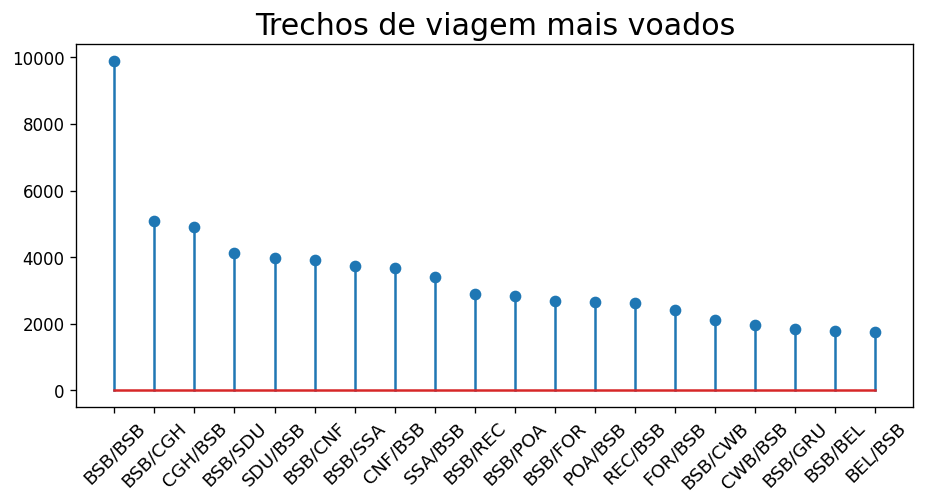

In [ ]:
plt.figure(figsize=(9,4), dpi=120)
plt.title('Trechos de viagem mais voados', fontsize=18)
plt.stem(df_trechos['trecho'], df_trechos['nome_parlamentar'])
plt.xticks(fontsize=11, rotation=45)
plt.show()

Ao olharmos a imagem, logo fica clara que o trecho mais usado é o chamado BSB/BSB. Esse trecho, no entanto, não representa um trajeto real e sim é usado para caracterizar diversas situações, como passagens remarcadas, voos internacionais, entre outros. Nesse sentido, é válido considerar que **os trechos mais voados são os que lugam o aeroporto de Brasília e o de Congonhas**. O top 20 é fechado pelo trecho entre Belém do Para e BSB.

#####**Qual a média de gastos por estado?**

In [ ]:
#código que cria uma tabela com a média dos gastos de cada Unidade da Federação
df_media_estados = round(df_valores_positivos.groupby(['UF'], as_index=False)[['vlr_liquido']].mean().sort_values(by='vlr_liquido', ascending=False), 2)
df_media_estados

UF  vlr_liquido
3   AP      2090.66
21  RR      1794.71
2   AM      1711.97
0   AC      1698.55
16  PI      1615.62
1   AL      1595.49
6   DF      1544.48
24  SE      1537.80
9   MA      1465.81
13  PA      1392.64
5   CE      1346.39
8   GO      1280.02
14  PB      1105.14
4   BA      1027.03
7   ES       960.41
26  TO       956.05
15  PE       951.29
11  MS       925.66
20  RO       875.59
19  RN       867.45
18  RJ       838.45
12  MT       822.47
17  PR       707.65
25  SP       700.49
10  MG       700.23
22  RS       578.01
23  SC       566.19

Pela tabela das médias por estado, podemos ver que **os estados com a maior média estão na regiao norte**, o que é compatível com o fato deles terem a maior cota permitida por estarem longe de Brasília e dos outros grandes centros. Já **os estados com o menor gasto médio estão nas regiões sul e sudeste**, também sendo compatível com o fato deles receberem uma cota menor. Vejamos as médias de todos os estados em um gráfico:

Text(0, 0.5, 'Média dos gastos')

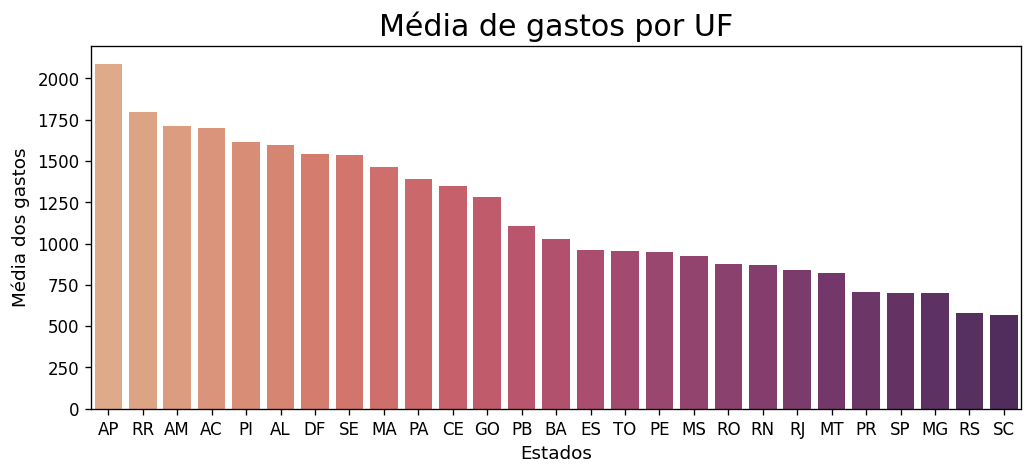

In [ ]:
plt.figure(figsize=(10,4), dpi=120)
plt.title('Média de gastos por UF', fontsize=18)
sns.barplot(x="UF", y="vlr_liquido", data=df_media_estados, palette="flare")
plt.xlabel('Estados', fontsize=11)
plt.ylabel('Média dos gastos', fontsize=11)

É interessante observar que o **Distrito Federal**, embora não esteja entre os cinco estados com a média mais alta, **aparece na parte de cima do ranking apesar de ser a Unidade Federativa com a menor cota parlamentar** disponível para os seus representantes. 

#####**Qual é o valor total de gastos por estado?**

In [ ]:
# Somando todos os gastos dos parlamentares a grupando por estado
pd.DataFrame(df_unico.groupby(["UF"])["vlr_liquido"].sum().sort_values(axis=0, ascending=False))

vlr_liquido
UF             
SP  52635438.40
MG  43162671.56
BA  39441897.60
RJ  36707801.80
PR  26785753.60
RS  25075845.74
CE  21933892.08
PE  21591701.23
MA  18126874.79
PA  16469118.51
GO  14416890.65
PB  12161287.75
AC  10293532.20
PI  10105986.48
SC   9722726.40
AP   8930724.82
AM   8698992.79
ES   7982895.03
SE   7970503.96
TO   7916891.67
RR   7854212.79
AL   7640373.82
RN   7500253.34
MT   7184822.30
MS   6942314.37
RO   5926355.59
DF   4303815.07

Text(0, 0.5, 'Valor Gasto')

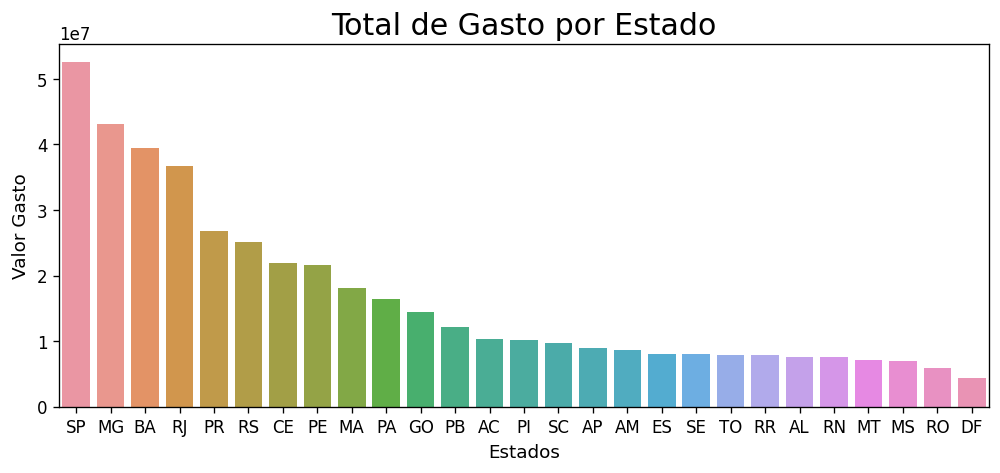

In [ ]:
# Atribuindo a soma a uma variável para plotar o gráfico
estado_valor = df_unico.groupby(["UF"],as_index = False)["vlr_liquido"].sum().sort_values(by='vlr_liquido', ascending=False)

# Determinando as características d gráfico
plt.figure(figsize=(10,4), dpi=120)
plt.title('Total de Gasto por Estado', fontsize=18)
sns.barplot(x="UF", y="vlr_liquido", data=estado_valor)
plt.xlabel('Estados', fontsize=11)
plt.ylabel('Valor Gasto', fontsize=11)


*   Cada Parlamentar possui uma cota mensal de acordo com o estado que representa e cada estado possui uma quantidade diferente de parlamentares. Apesar de São Paulo possuir a 5ª menor cota, é o estado com mais representantes (com o máximo de 70 deputados e 3 senadores), o que explica a soma total, da amostra de 32 meses, ser a maior, seguido por Minas gerais com 56 representantes.
*   Na sequência temos Bahia com 42 e Rio de Janeiro com 49 representantes. Bahia possui gasto total maior pois sua cota supera a do Rio de Janeiro em `R$3.250,88`.
*   Rio Grande do Sul possui cota `R$2.004,04` e 1 representante a mais que Paraná, apesar de aparecer atrás na soma total de gastos.



#####**Quais estados têm maior número de representantes?**

In [ ]:
# Somando a ocorrência distinta de cada nome de parlamentar agrupando por estado
representantes_por_estado = df_unico.groupby(["UF"],as_index = False)["nome_parlamentar"].nunique().sort_values(by="nome_parlamentar", ascending=False)
pd.DataFrame(representantes_por_estado)

UF  nome_parlamentar
25  SP               104
18  RJ                82
10  MG                81
4   BA                56
22  RS                47
17  PR                46
5   CE                39
15  PE                38
9   MA                34
23  SC                30
8   GO                27
13  PA                27
14  PB                20
7   ES                17
11  MS                16
12  MT                15
6   DF                15
16  PI                15
3   AP                15
0   AC                14
1   AL                14
2   AM                14
20  RO                13
21  RR                13
19  RN                13
24  SE                12
26  TO                12

Text(0, 0.5, 'Quantidade de Parlamentares')

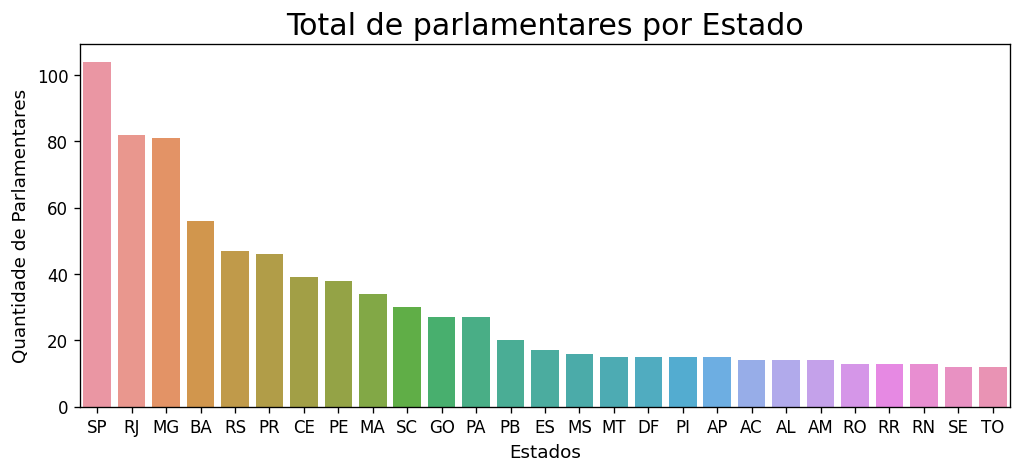

In [ ]:
# Plotando o gráfico
plt.figure(figsize=(10,4), dpi=120)
plt.title('Total de parlamentares por Estado', fontsize=18)
sns.barplot(x="UF", y="nome_parlamentar", data=representantes_por_estado)
plt.xlabel('Estados', fontsize=11)
plt.ylabel('Quantidade de Parlamentares', fontsize=11)



*   A Constituição Federal determina que deve haver proporcionalidade do número de deputados federais por estado em relação à população deles, com base em dados fornecidos pelo censo do IBGE. A partir desses dados, uma lei complementar deve ser votada no ano anterior às eleições, com os ajustes necessários, desde que nenhuma das unidades da Federação tenha menos de oito ou mais de setenta deputados.

*   O grupo dos chamados parlamentares é composto pelos Deputados Federais e Senadores de cada estado. Os deputados são eleitos para um mandato de 4 anos e os senadores para dois mandatos, ou seja, 8 anos. Durante o período de seu mandato, suplentes podem assumir o poder após o desligamento por algum motivo do titular, o que explica a diferença nos números.


#####**Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?**

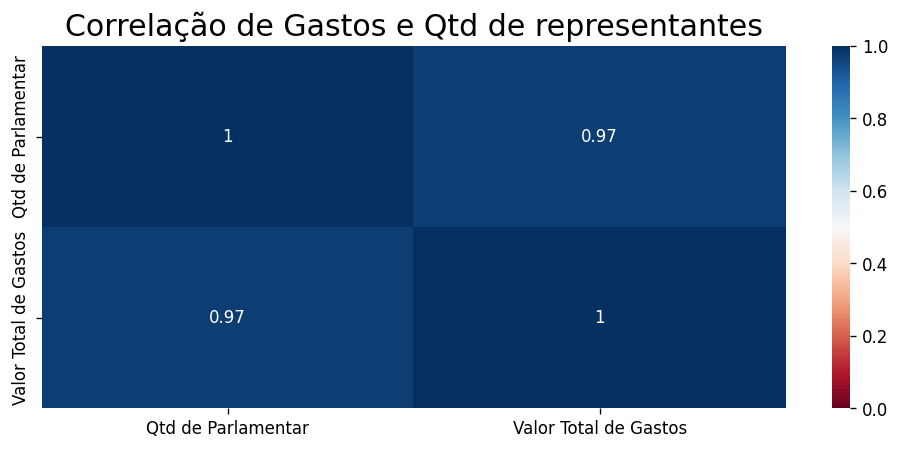

In [ ]:
# Somando o valores gastos pelos parlamentares de cada estado
estado_vlr = df_unico.groupby(["UF"], as_index = True)["vlr_liquido"].sum()

# Contando a quantidade de parlamentares por estado
representantes_estado = df_unico.groupby(["UF"], as_index = True)["nome_parlamentar"].nunique()

# Concatenando os filtros em um DataFrame para plotagem do gráfico
df_corr = pd.concat([estado_vlr, representantes_estado], axis=1)

# Renomeando as colunas
df_corr.columns = ['Qtd de Parlamentar', 'Valor Total de Gastos']

# Plotando gráfico de temperatura
plt.figure(figsize=(10,4), dpi=120)
plt.title('Correlação de Gastos e Qtd de representantes', fontsize=18)
sns.heatmap(df_corr[["Qtd de Parlamentar", "Valor Total de Gastos"]].corr(), vmin = 0, vmax = 1.0, cmap = 'RdBu', annot = True)

*   Podemos avaliar pelo gráfico de temperatura que existe uma forte correlação entre o valor total gasto pelos parlamentares de cada estado e a quantidade de parlamentares, isso se dá pela disparidade de representantes que cada estado possui. Como a cota parlamentar não varia proporcionalmente a quantidade de representantes e sim pela distância da capital brasileira, essa correlação é endossada pela representação do gráfico anterior, da soma total de gastos por estado, que acompanha de forma proporcional a distribuição da quantidade representantes.


#####**Qual a média de gastos por partido?**

A princípio realizamos o agrupamento do dataset por partido pois este agrupamento servirá para as 3 proximas questões.

In [ ]:
# Agrupando os dados por partido
partido_df = df_unico.groupby('partido', as_index=False)

Em seguida, calculamos a media de cada partido partindo do valor liquido de gastos e renomeamos a coluna para um melhor entendimento.

In [ ]:
# Calculando a média de cada partido
media_partido = partido_df[['partido', 'vlr_liquido']].mean()

# Renomeando as colunas
media_partido = media_partido.rename(columns = {'partido' : 'Partido', 'vlr_liquido' : 'Média'})

# Ordenando a coluna Média
media_partido = media_partido.sort_values(by = 'Média')

# Exibindo os dados
media_partido.style.hide_index()

Por fim, geramos um gráfico de barras para vizualizar como os partidos se comportaram em relação aos gastos.

Text(0, 0.5, 'Gasto médio (R$)')

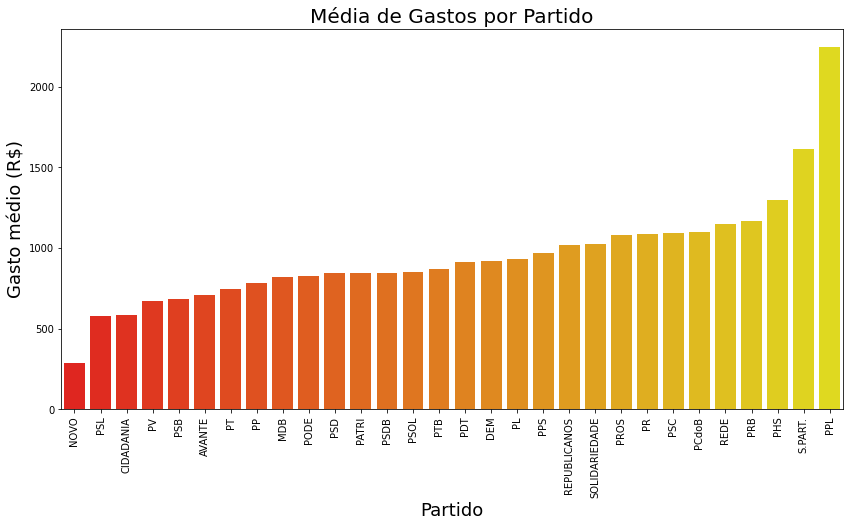

In [ ]:
# Aplicando um titulo ao gráfico
plt.title('Média de Gastos por Partido', fontsize=20)

# Plotando o gráfico
media_partido_graf = sns.barplot(x="Partido", y="Média", data=media_partido, palette="autumn").figure.set_size_inches(14, 7)

# Rotacionando o eixo x para melhor vizualização
plt.xticks(rotation = 90)

# Nomeando os eixos
plt.xlabel('Partido', fontsize=18)
plt.ylabel('Gasto médio (R$)', fontsize=18)

Os  partidos com o maior gasto médio são **PPL, PHS, PRB e REDE**. Também aparecem com uma média alta os parlamentares sem partido. Já a legenda que menos gastou foi o Novo.

#####**Quais são os partidos que mais e que menos consumiram a cota parlamentar?**

Para esta analise somamos o valor liquido de cada partido e ordenamos para identificar os partidos que mais consumiram e os que menos consumiram a cota parlamentar.

In [ ]:
# Somando os partidos agrupados
consumo_partido = partido_df[['vlr_liquido']].sum()

# Ordenando o dataframe pela coluna vlr_liquido
consumo_partido = consumo_partido.sort_values(by='vlr_liquido')

# Renomeando as colunas
consumo_partido = consumo_partido.rename(columns = {'partido' : 'Partido', 'vlr_liquido' : 'Consumo Total'})

# Exibição do Dataframe ocultando o index
consumo_partido.style.hide_index()

Text(0, 0.5, 'Consumo Total em Milhões (R$)')

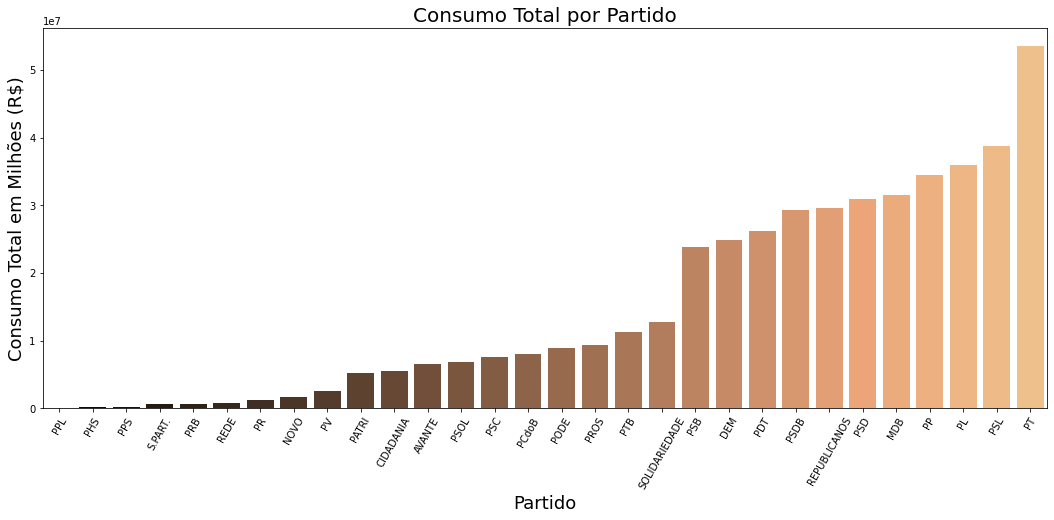

In [ ]:
# Aplicando um titulo ao gráfico
plt.title('Consumo Total por Partido', fontsize=20)

# Plotando o gráfico
consumo_partido_graf = sns.barplot(data=consumo_partido, x = "Partido", y = "Consumo Total", palette="copper").figure.set_size_inches(18, 7)

# Rotacionando o eixo x para melhor vizualização
plt.xticks( rotation = 60)

# Nomeando os eixos
plt.xlabel('Partido', fontsize=18)
plt.ylabel('Consumo Total em Milhões (R$)', fontsize=18)

Observando o gráfico...

Vemos que os 3 partidos que menos gastaram a cota parlamentar foram:


* PPL

* PHS

* PPS

---

E os 3 partidos que mais gastaram a cota parlamentar foram:


* PT

* PSL

* PL
---

#####**Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?**

Para esta verificação buscamos o agrupamento dos partidos junto a contagem de parlamentares e a soma dos gastos de cada parlamentar por partido.

In [ ]:
# Criando um novo dataFrame com os partidos, a quantidade de parlamentares e a soma de gasto.
partido_parlamentares = partido_df.agg({'nome_parlamentar' : 'nunique', 'vlr_liquido' : 'sum'})

# Renomeando as colunas
partido_parlamentares.columns = ['Partido', 'Qtd de Parlamentar', 'Soma de Gastos']

# Exibindo o DataFrame partido_parlamentares
partido_parlamentares.style.hide_index()

Fizemos a correlação entre as duas colunas quantitativas.

In [ ]:
# Aplicando a função corr para verificar se há correlação entre as variáveis
partido_parlamentares.corr()

Qtd de Parlamentar  Soma de Gastos
Qtd de Parlamentar            1.000000        0.914053
Soma de Gastos                0.914053        1.000000

É possivel observar que há uma correlação de `0.914053`, ou seja, positivamente forte entre a quantidade de parlamentares por partido e seus gastos demonstrando que a quantidade influencia muito no valor total de gastos.

Realizamos a plotagem de um gráfico de calor para observar essa correlação de forma mais clara.

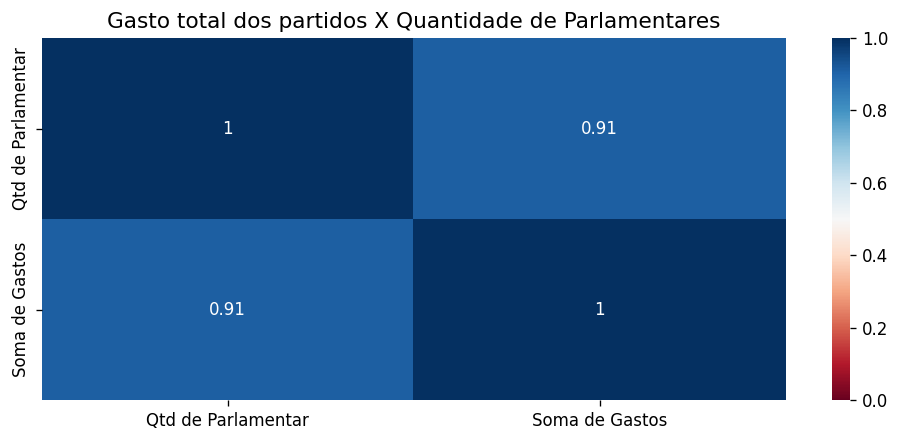

In [ ]:
#Ajustando o tamanho do gráfico
plt.figure(figsize=(10,4), dpi=120)

# Aplicando um titulo ao gráfico
plt.title('Gasto total dos partidos X Quantidade de Parlamentares', fontsize=13)

# Plotando o gráfico
sns.heatmap(partido_parlamentares[["Qtd de Parlamentar", "Soma de Gastos"]].corr(), vmin = 0, vmax = 1.0, cmap = 'RdBu', annot = True)

Fizemos tambem um gráfico de dispersão para acompanhar o comportamento das variáveis

Text(0, 0.5, 'Total dos gastos em milhões (R$)')

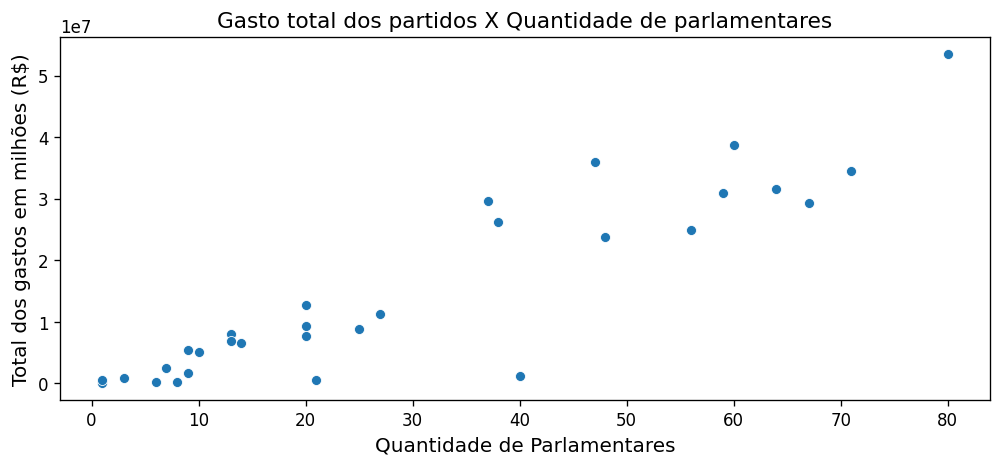

In [ ]:
#Ajustando o tamanho do gráfico
plt.figure(figsize=(10,4), dpi=120)

# Aplicando um titulo ao gráfico
plt.title('Gasto total dos partidos X Quantidade de parlamentares', fontsize=13)

# Plotando o gráfico
sns.scatterplot(data=partido_parlamentares, x="Qtd de Parlamentar", y="Soma de Gastos", palette="deep")

# Nomeando os eixos
plt.xlabel('Quantidade de Parlamentares', fontsize=12)
plt.ylabel('Total dos gastos em milhões (R$)', fontsize=12)

Com isso, é possivel afirmar que há sim uma correlação positivamente forte entre a quantidade de parlamentares e a soma total de gastos por partido tendo em vista que existe uma distribuição relativamente uniforme entre ambas, ou seja, quanto maior uma maior a outra.

#### **3.2.Propondo outras análises**


#####**Como é a distribução dos valores nas categorias de gastos**

Já analisamos anteriormente quais são as categorias de gastos tiverem os maiores valores totais no período avaliado. Porém, para uma análise mais completa, consideramos importante destrinchar ainda mais o comportamento dos gastos de cada categoria, investigando como é a distribuição dos valores em cada uma delas, quais tem os maiores e menors gastos médios, e em qual delas se concentra os maiores outliers, por exemplo. 

Começaremos fazendo histogramas para cada uma das categorias de gastos. Escolha as categorias clicando nos nomes delas na legenda do lado direito:

In [ ]:
px.histogram(
    df_unico,
    'vlr_liquido',
    color='descricao',
    nbins=80,
    opacity = 0.6,
    barmode='overlay',
    histnorm='percent',
    labels={'vlr_liquido': 'Valor Líquido',
            'descricao': 'Subcotas'}
    #marginal='box',
    #height=500
)

Ao interagir com o gráfico, podemos perceber que categorias como **Locação de Aeronaves, Consultoria, Pesquisa e Trabalhos Técnicos e Divulgação de Atividade Parlamentar**, possuem outiliers com valores muito elevados. Além disso, essas mesmas categorias tem mais valores distribuídos e faixas de gastos mais elevados do que categorias como Fornecimento de Alimentação, que tem quase 100% de seu valores na faixa entre 0 e 2 mil reais. 

Ao fazermos uma lista dos gastos médios de cada categoria, vemos as categorias citadas aparecerem no topo, como esperado:

In [ ]:
#gasto médio por caegoria
round(df_valores_positivos.groupby(['descricao'], as_index=False)[['vlr_liquido']].mean().sort_values(by='vlr_liquido', ascending=False), 1)

descricao  vlr_liquido
6                  LOCAÇÃO OU FRETAMENTO DE AERONAVES      13490.0
2       CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.       9059.4
3                DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.       4362.8
8       LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES       4330.4
7                LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES       3937.2
10  PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR       2884.2
15  SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...       1718.2
11                         PASSAGEM AÉREA - REEMBOLSO       1179.0
9   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...       1107.4
12                               PASSAGEM AÉREA - RPA        882.0
13                            PASSAGEM AÉREA - SIGEPA        486.6
0                           ASSINATURA DE PUBLICAÇÕES        406.4
5   HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...        294.1
1                       COMBUSTÍVEIS E LUBRIFICANTES.        263.5
18                                          TELEFONIA        228.2
17                                   SERVIÇOS POSTAIS        149.8
14        PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS        115.6
4          FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR         75.8
16          SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO         32.2

Vejamos então quais foram os 30 maiores valores líquidos do período, com suas respectivas categorias e datas: 

In [ ]:
#categorias dos valores mais altos do df
df_unico.nlargest(columns='vlr_liquido', n=30)[['descricao', 'mes', 'ano', 'vlr_liquido']] 

descricao mes   ano  vlr_liquido
318233           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020     151260.0
88630            DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2019     145140.0
418152           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020     144640.0
280511           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  11  2019     110000.0
109715           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2019     109500.0
344876           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020     105600.0
349693           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020     104520.0
352129                               SERVIÇOS POSTAIS  12  2020     100587.0
363310           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020     100000.0
32400            DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  04  2019      96000.0
345751           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      90300.0
271830           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2019      90000.0
110854           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  01  2019      86000.0
361618           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      85550.0
370815           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      85250.0
534520           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  07  2021      83750.0
441670             LOCAÇÃO OU FRETAMENTO DE AERONAVES  12  2020      82500.0
321547           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  11  2020      82000.0
338461           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      81420.0
333076           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      80200.0
406291                               SERVIÇOS POSTAIS  12  2020      79950.0
111230           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2019      79800.0
317217  CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.  12  2020      75000.0
347366           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      75000.0
389350           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      75000.0
441666             LOCAÇÃO OU FRETAMENTO DE AERONAVES  09  2020      75000.0
516953           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  01  2021      75000.0
113421           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2019      73750.0
424884           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  12  2020      72200.0
550653           DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.  08  2021      70900.0

Podemos observar que a categoria Divulgação da Atividade Parlamentar predomina na lista, bem como datas próximas ao fim de cada ano. Considerando que a cota mensal é cumulativa dentro do ano, é possível pensar na hipótese de que os parlamentares deixem os gastos mais elevados para o final do ano, uma vez que, nesse momento, sabem quanto da cota já usaram e quanto ainda resta e não pode ser acumulada para o ano seguinte. Para confirmar se de fato os gastos mais elevados aparecem em maior quantidade no final de cada ano, faremos um gráfico:

In [ ]:
#criando um dataset apenas com os valores maiores que 10 mil reais
df_outliers = df_unico.query('vlr_liquido > 10000')

In [ ]:
lista_meses = ['Janeiro 2019', 'Fevereiro 2019', 'Março 2019', 'Abril 2019','Maio 2019', 'Junho 2010', 'Julho 2019', 'Agosto 2019', 'Setembro 2019', 'Outubro 2019', 'Novembro 2019', 'Dezembro 2019', 'Janeiro 2020', 'Fevereiro 2020', 'Março 2020', 'Abril 2020','Maio 2020', 'Junho 2020', 'Julho 2020', 'Agosto 2020', 'Setembro 2020', 'Outubro 2020', 'Novembro 2020', 'Dezembro 2020', 'Janeiro 2021', 'Fevereiro 2021', 'Março 2021', 'Abril 2021','Maio 2021', 'Junho 2021', 'Julho 2021', 'Agosto 2021']

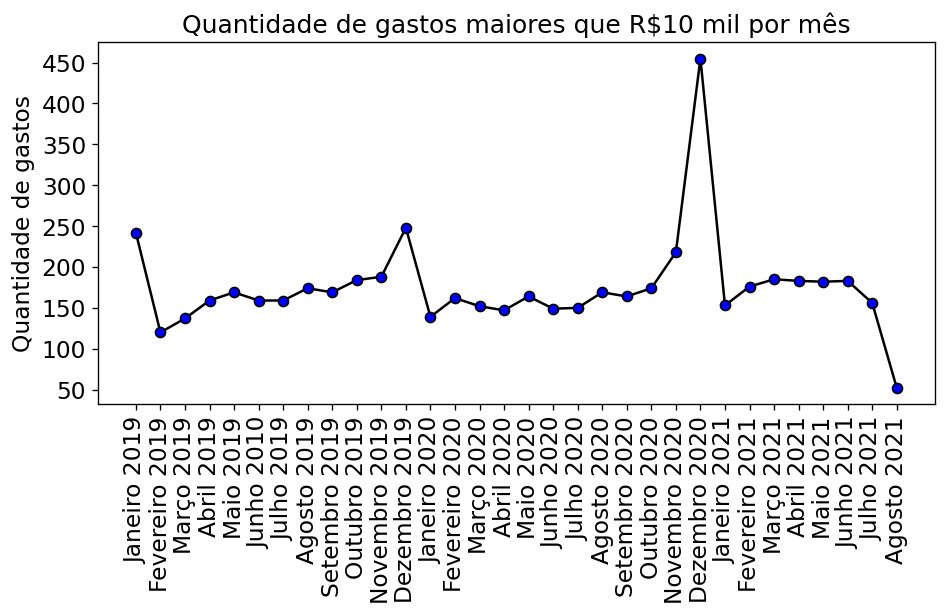

In [ ]:
#calculando a quantidade dos valores liquidos maiores que 10 mil reais por mês
df_quantidade_mes = df_outliers.groupby(['ano_mes'], as_index=False)[['vlr_liquido']].count()

#plotando um gráfico que mostra a distribuição da quantidade ao longo das datas
plt.figure(figsize=(9,4), dpi=120)
plt.title('Quantidade de gastos maiores que R$10 mil por mês', fontsize=15)

plt.plot(
    df_quantidade_mes['ano_mes'],
    df_quantidade_mes['vlr_liquido'],
    'ko-', mfc='b')

plt.ylabel('Quantidade de gastos', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(df_quantidade_mes['ano_mes'], lista_meses, fontsize=14, rotation=90)

plt.show()

De fato é possível afirmar que o número de gastos com valor líquido superior a 10 mil reaisl cresce bastante nos meses finais do ano. No caso de 2019, o valor também estava alto em janeiro, que é um mês que ainda recebe notas referentes aos meses finais do ano anterior graças a regra dos 90 dias para a declaração. Em dezembro em 2020 temos um pico enorme, com a quantidade de declaração de notas com valores superior a 10 mil reais triplicando. 

Vale ressaltar que a categoria que mais aparece entre em 30 maiores gastos é uma categoria que não tem limite de gastos determinado pela lei, o que torna possível o reembolso de valores na casa dos R$ 100 mil. O gasto mais caro do dataset, por exemplo, de 151260,00 reais em dezembro de 2020, é referente a confecção de 50 mil cópias de uma revista sobre as atividades do parlamentar Edmilson Rodrigues, do PSOL do Pará. Esse valor equivale a cerca de 3 meses inteiros da cota a que ele tem direito.  

In [ ]:
df_unico.query('vlr_liquido == 151260')

nome_parlamentar  ano_legislatura  UF partido  subcota  \
318233  Edmilson Rodrigues             2019  PA    PSOL        5   

                                   descricao  especificacao_subcota  \
318233  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                      0   

       descricao_especificacao        fornecedor  CNPJCPF_fornecedor  \
318233                     NaN  S.R.DE O. LOBATO  221.062.700/0011-4   

       numero_documento  tipo_documento        data_emissao  vlr_documento  \
318233         00001243               0 2020-12-18 01:00:00       151260.0   

        vlr_glosa  vlr_liquido mes   ano  num_parcela passageiro trecho  \
318233        0.0     151260.0  12  2020            0        NaN    NaN   

        lote_documento  num_ressarcimento  vlr_restituicao  id_documento  \
318233         1735176                NaN              NaN       7133032   

                                            url_documento  ano_mes  
318233  https://www.camara.leg.br/cota-parlamentar/doc...  2020-12

#####**Análise da coluna 'Valor de Restituição'**

 A coluna valor de restituição possui quase 100% de seus dados faltantes, mas mesmo assim possui infomações importantes sobre os gatos dos parlamentares e que merecem ser tema de análise.

In [ ]:
#código que verifica os dados faltantes da coluna 'Valor de restituição"
round(df_unico['vlr_restituicao'].isnull().mean()*100, 2)

99.93

Os valores dessa coluna são gastos dos parlamentares que foram restituiídos para os cofres públicos não sendo pagos pela cota parlamentar. Nessa lista estão, por exemplo, alguns gastos não cobertos pela lei e que foram inicialmente lançados sem glosa. Parlamentares devolveram taxa de seriço de restaurantes, assinatura de aplicativos de reunião online, entre outros. 

Para começarmos a análise, vajemos como os valores da coluna se distribuem:

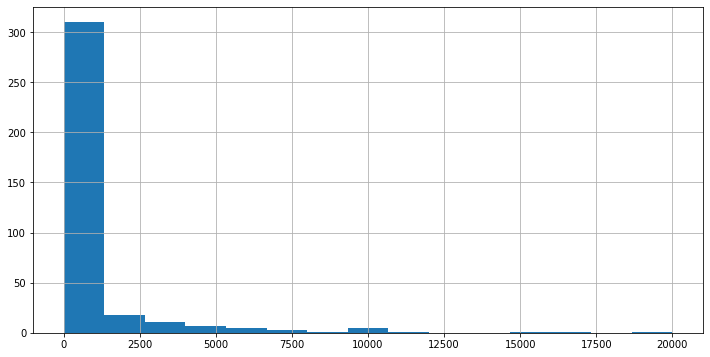

In [ ]:
df_unico.vlr_restituicao.hist(bins = 15, figsize=(12,6))

Percebemos que a maioria dos valores estão concentrados na faixa entre 0 e 1250 reais, com poucas ocorrências nas demais faixas. Vamos ver então, quais parlamentares mais restituíram dinheiro para os cofres públicos:

In [ ]:
parlamentares_restituicao = df_unico.groupby(['nome_parlamentar'], as_index=False)[['vlr_restituicao']].sum().sort_values(by='vlr_restituicao', ascending=False)

parlamentares_restituicao = parlamentares_restituicao.query('vlr_restituicao > 0').head(20)

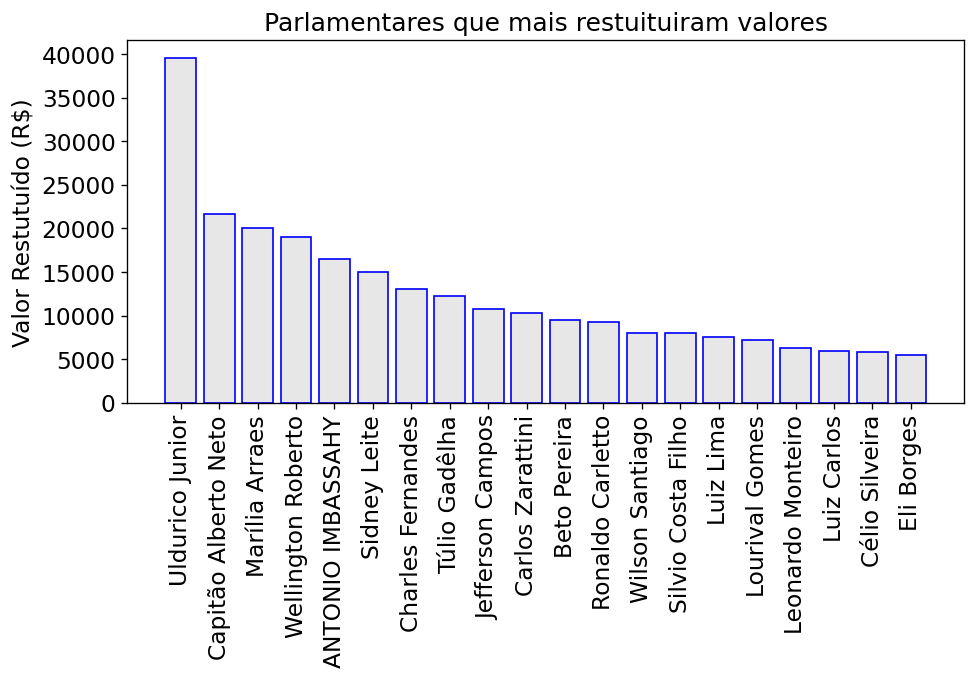

In [ ]:
plt.figure(figsize=(9,4), dpi=120)
plt.title('Parlamentares que mais restuituiram valores', fontsize=15)

plt.bar(parlamentares_restituicao['nome_parlamentar'], parlamentares_restituicao['vlr_restituicao'], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

plt.ylabel('Valor Restutuído (R$)', fontsize=14)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.show()

Vamos listar então quais categorias de gastos tiveram mais valores restituídos:

In [ ]:
restituicao_por_subcota = df_unico.groupby(['descricao'], as_index=False)[['vlr_restituicao']].sum().sort_values(by='vlr_restituicao', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

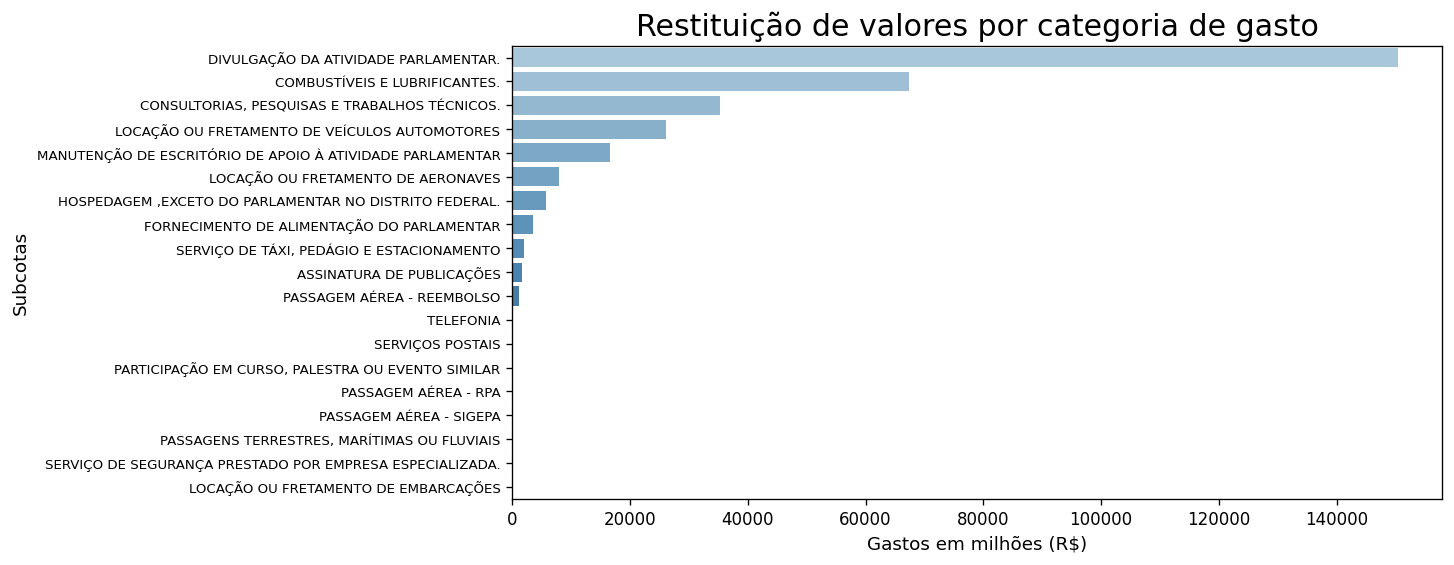

In [ ]:
plt.figure(figsize=(10,5), dpi=120)
plt.title('Restituição de valores por categoria de gasto', fontsize=18)
sns.barplot(x="vlr_restituicao", y="descricao", data=restituicao_por_subcota, palette="Blues_d")
plt.xlabel('Gastos em milhões (R$)', fontsize=11)
plt.ylabel('Subcotas', fontsize=11)
plt.yticks(fontsize=8)

Como o gráfico mostra, as cinco categorias que tiveram mais valores restituídos foram: **Divulgação da Atividade Parlamentar, Combustíveis e Lubrificantes, Consultorias, Pesquisas e Trabalho Técnicos, Locação ou Freteamento de Veículos Automotores, Manutenção de Escritório de Apoio à Atividade Parmalemtar**.

Quanto aos partidos, vejamos quais deles restituíram mais valores:

In [ ]:
restituicao_partido = df_unico.groupby(['partido'], as_index=False)[['vlr_restituicao']].sum().sort_values(by='vlr_restituicao', ascending=False)

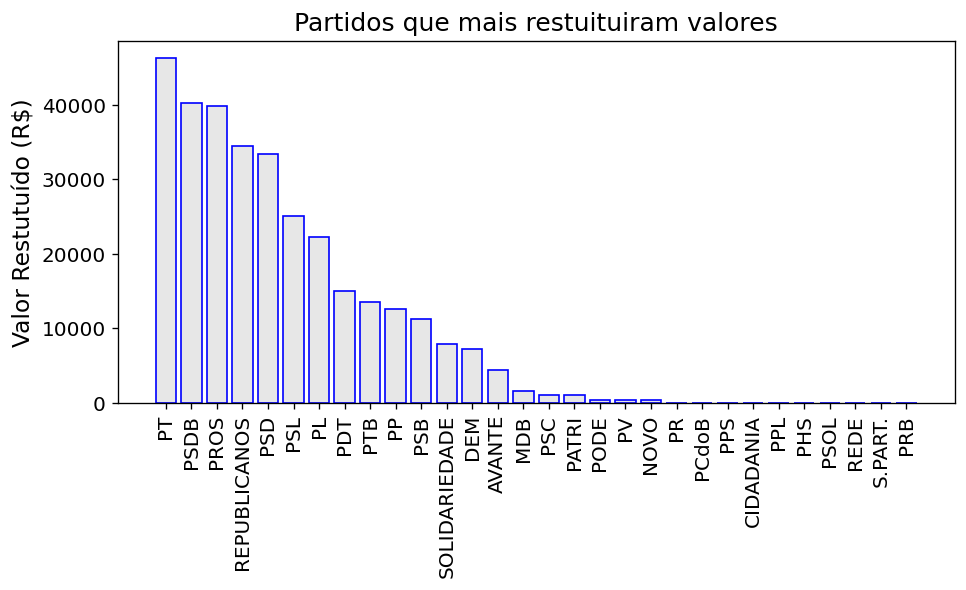

In [ ]:
plt.figure(figsize=(9,4), dpi=120)
plt.title('Partidos que mais restuituiram valores', fontsize=15)

plt.bar(restituicao_partido['partido'], restituicao_partido['vlr_restituicao'], color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')

plt.ylabel('Valor Restutuído (R$)', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.show()

Os partidos que mais restituíram valores aos cofres públicos foram: **PT, PSDB, PROS, Republicanos e PSD**.

Por fim, vajemos quais foram as restituíções de valores mais altos:

In [ ]:
df_unico.nlargest(columns='vlr_restituicao', n=30)[['nome_parlamentar', 'partido', 'descricao', 'vlr_restituicao']] 

nome_parlamentar       partido  \
402105        Marília Arraes            PT   
89915      ANTONIO IMBASSAHY          PSDB   
275830          Sidney Leite           PSD   
551760  Capitão Alberto Neto  REPUBLICANOS   
296452    Wellington Roberto            PL   
356787       Uldurico Junior          PROS   
356789       Uldurico Junior          PROS   
551762  Capitão Alberto Neto  REPUBLICANOS   
511327          Beto Pereira          PSDB   
296450    Wellington Roberto            PL   
209094    Silvio Costa Filho  REPUBLICANOS   
173439        Lourival Gomes           PSL   
356800       Uldurico Junior          PROS   
332660         Túlio Gadêlha           PDT   
346018           Luiz Carlos          PSDB   
357971        Célio Silveira          PSDB   
332658         Túlio Gadêlha           PDT   
298445     Leonardo Monteiro            PT   
320556      Carlos Zarattini            PT   
421076       Gilberto Abramo  REPUBLICANOS   
464186   Maurício Dziedricki           PTB   
356785       Uldurico Junior          PROS   
24744       Jefferson Campos           PSB   
378214          Greyce Elias        AVANTE   
50131        Gleisi Hoffmann            PT   
16550        Wilson Santiago           PTB   
16552        Wilson Santiago           PTB   
396546         Filipe Barros           PSL   
410125             Luiz Lima           PSL   
410127             Luiz Lima           PSL   

                                                descricao  vlr_restituicao  
402105               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.         20000.00  
89915                DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.         16542.58  
275830      CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.         15000.00  
551760               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.         11880.00  
296452               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.         10000.00  
356787               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.         10000.00  
356789               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.         10000.00  
551762               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          9783.00  
511327      LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES          9500.00  
296450               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          9000.00  
209094      CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.          8000.00  
173439      LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES          7000.00  
356800               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          7000.00  
332660      CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.          6077.50  
346018                      COMBUSTÍVEIS E LUBRIFICANTES.          6000.00  
357971                      COMBUSTÍVEIS E LUBRIFICANTES.          5799.63  
332658      CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.          5500.00  
298445                      COMBUSTÍVEIS E LUBRIFICANTES.          5462.80  
320556               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          5000.00  
421076      LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES          4713.00  
464186  MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...          4545.86  
356785               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          4516.13  
24744                       COMBUSTÍVEIS E LUBRIFICANTES.          4394.10  
378214      LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES          4351.27  
50131   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...          4219.10  
16550                  LOCAÇÃO OU FRETAMENTO DE AERONAVES          4000.00  
16552                  LOCAÇÃO OU FRETAMENTO DE AERONAVES          4000.00  
396546               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          4000.00  
410125               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          3800.00  
410127               DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.          3800.00

#####**Que categorias tem um maior valor de glosa?**

Algumas categorias de gastos tem limites definidos por lei e, por isso, muitas vezes entram no sistema com um valor de glosa já definido. Mas como acontece nas outras categorias? Há um valor de glosa alto naquelas que não tem limite legal? Para saber, vamos ver como fica a lista de totais de glosa por categoria:

In [ ]:
glosa_por_subcota = round(df_unico.groupby(['descricao'], as_index=False)[['vlr_glosa']].sum().sort_values(by='vlr_glosa', ascending=False), 1)
glosa_por_subcota 

descricao  vlr_glosa
9   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...   520182.7
18                                          TELEFONIA   485032.5
1                       COMBUSTÍVEIS E LUBRIFICANTES.   440494.0
8       LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES   290933.8
3                DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.   228359.5
2       CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.    59286.6
5   HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO ...    46341.6
16          SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO    35289.0
4          FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR    30285.6
10  PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR     9744.3
11                         PASSAGEM AÉREA - REEMBOLSO     8782.5
15  SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...     8736.2
17                                   SERVIÇOS POSTAIS     1275.4
0                           ASSINATURA DE PUBLICAÇÕES      942.5
14        PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS      878.8
7                LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES      100.0
12                               PASSAGEM AÉREA - RPA        0.0
13                            PASSAGEM AÉREA - SIGEPA        0.0
6                  LOCAÇÃO OU FRETAMENTO DE AERONAVES        0.0

De cara percebemos que quem ocupa o topo da lista é uma categoria sem limite lega. Vejamos no gráfico:

In [ ]:
fig = px.bar(glosa_por_subcota.query('vlr_glosa > 0'), 
             y="descricao", 
             x="vlr_glosa", 
             title="Categorias com o maior total de glosa",
             text_auto='.2s', 
             labels={'descricao': 'Categorias',
            'vlr_glosa': 'Valor total de Glosa (R$)'})

fig.update_traces(textfont_size=12, cliponaxis=False)
fig.show()

As duas com mais valores glosados não estão entre as limitas por lei. Apenas na terceira posição aparece a categoria de combustível, que tem teto de R$ 6 mil.

Vejamos, então, quais parlametarem tiveram mais valores glosados, ou seja, valores de seus documentos fiscais que não serão reembolsados pelo governo:

In [ ]:
glosa_parlamentares = round(df_unico.groupby(['nome_parlamentar'], as_index=False)[['vlr_glosa']].sum().sort_values(by='vlr_glosa', ascending=False), 1).head(20)

In [ ]:
fig = px.bar(glosa_parlamentares, 
             x="nome_parlamentar", 
             y="vlr_glosa", 
             title="Parlamentares com a maior soma de Valor de Glosa",
             text_auto='.2s', 
             labels={'nome_parlamentar': 'Parlamentares',
            'vlr_glosa': 'Valor total de Glosa (R$)'})

fig.update_traces(textfont_size=12, cliponaxis=False)
fig.show()

A parlamentar Professora Marcivânia foi a que teve o maior valor bloqueado, **86 mil reais**, mais que o dobro do segundo do ranking, que teve **R$27 mil** bloequeados. Abaixo, vemos que o valor glosado da deputada foi bloqueado de uma mesma nota:

In [ ]:
df_unico.query('vlr_glosa > 80000')

nome_parlamentar  ano_legislatura  UF partido  subcota  \
110854  Professora Marcivania             2015  AP   PCdoB        5   

                                   descricao  especificacao_subcota  \
110854  DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.                      0   

       descricao_especificacao             fornecedor  CNPJCPF_fornecedor  \
110854                     NaN  NUNES SERVICOS EIRELI  276.040.510/0018-9   

       numero_documento  tipo_documento data_emissao  vlr_documento  \
110854              176               0   2019-01-24       172000.0   

        vlr_glosa  vlr_liquido mes   ano  num_parcela passageiro trecho  \
110854    86000.0      86000.0  01  2019            0        NaN    NaN   

        lote_documento  num_ressarcimento  vlr_restituicao  id_documento  \
110854         1557845                NaN              NaN       6746279   

                                            url_documento  ano_mes  
110854  https://www.camara.leg.br/cota-parlamentar/doc...  2019-01

##4.Conclusão

*   Os gastos com a cota parlamentar **dimunuíram em 2020 com relação à 2019**. No entanto, não é possível afirmar que essa tendência se mantém em 2021. 
*   Os cinco parlamentares que tiveram o maior gasto médio no período são **José Reinaldo, Alberto Fraga, Delegado Francischini, Heuler Cruvinel e César Halum**.
*   Os cinco parlamentares que tiveram a maior soma de gastos no período são **Jéssica Sales, Silas Câmara, Wellington Roberto, Juscelino Filo e João Maia**.
*   Os cinco parlamentar que tiveram a menor soma de gastos no período são **Luciana Santos, Luiz Henrique Mandetta, Pedro da Lua, Sarney Filho e Geraldo Resende**.
*   As categorias de gasto mais onerosas são **Divulgação da Atividade Parlamentar, Locação ou Freteamento de Veículos Automotores, Manutenção de Escritório de Apoio à Atividade Parmalemtar e Consultorias, Pesquisas e Trabalhos Técnicos**.
*   O trecho de viagem mais recorrente é o **BSB/BSB**, que não é um trecho real. Portanto, os trechos reais mais reccorentes são **viagens entre os aeroportos de Brasília e Congonhas**, em São Paulo, em ambos os sentidos.
*   Os cinco estados com o maior gasto médio são **Amapá, Roraima, Amazonas, Acre e Piauí**.
*   Os cinco estados com o maior gasto total são **São Paulo, Minas Gerais, Bahia, Rio de Janeiro e Paraná**.
*   Os cinco estados com o maior número de representantes são **São Paulo, Rio de Janeiro, Minas Gerais, Bahia e Rio Grande do Sul**.
*   Existe uma **correlação positiva alta** entre a quantidade de parlamentares do estado e o seu total de gastos.
*   Os cinco partidos com o maior gasto médio são **PPL, Parlamentares sem Partido, PHS, PRB e REDE**.
*   Os cinco partidos que mais consumiram a cota parlamentar são **PT, PSL, PL, PP E MDB**.
*   Existe uma **correlação positiva alta** entre a quantidade de parlamentares por partido e os gastos totais de cada legenda. 
*  Categorias como **Locação de Aeronaves, Consultoria, Pesquisa e Trabalhos Técnicos e Divulgação de Atividade Parlamentar**, possuem outiliers com valores muito elevados
*  Os gatos com valor superior a R$ 10 mil acontencem com muito mais frequencia nos últimos meses do ano.
*   Os cinco parlamentares que mais restituíram valores no período são **Uldurico Junior, Capitão Alberto Neto, Marília Arraes, Wellington Roberto e Antônio Imbassahy**.
*  As cinco categorias que tiveram mais valores restituídos foram: **Divulgação da Atividade Parlamentar, Combustíveis e Lubrificantes, Consultorias, Pesquisas e Trabalho Técnicos, Locação ou Freteamento de Veículos Automotores, Manutenção de Escritório de Apoio à Atividade Parmalemtar**.
*  Os partidos que mais restituíram valores aos cofres públicos foram: **PT, PSDB, PROS, Republicanos e PSD**.
* As três categorias de gastos que mais tiveram valores gloasado foram **Manutenção de escritório de apoio à atividade parlamentar, Telefonia e combustíveis e lubrificantes**.


##5.Referências

https://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-norma-cd-mesa.html

https://serenata.ai/

https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar

https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml

https://drive.google.com/drive/u/0/folders/1H_uQc8UTzA1is3jjZjmrFRIabiOUHoIi

https://agenciasportlight.com.br/index.php/2020/05/01/exclusivo-bolsonaro-bateu-recorde-em-nota-fiscal-de-gasolina-um-mes-apos-eleicao-de-2006-e-teve-reembolso-parlamentar-negado/

https://www2.camara.leg.br/transparencia/acesso-a-informacao/copy_of_perguntas-frequentes/cota-para-o-exercicio-da-atividade-parlamentar
